In [43]:
library(pacman)

# Use pacman to load the packages
p_load(car)
p_load(dplyr)
p_load(tidyverse, VIM, mice, Hmisc, 
               DMwR, naniar)
p_load(stargazer)
p_load(openxlsx)
p_load(here)
p_load(rio)
p_load(ggplot2)
p_load(BSDA)
p_load(corrplot)
p_load(caTools)
p_load(keras)
p_load(reticulate)
p_load(readr)
p_load(writexl)
p_load(stringr)
p_load(caTools)
p_load(scales)
p_load(reshape2)
p_load(MASS)


In [8]:
py_install("tensorflow")

+ "C:/Users/angme/anaconda3/condabin/conda.bat" "install" "--yes" "--prefix" "C:/Users/angme/anaconda3" "-c" "conda-forge" "tensorflow"



Import File

In [ ]:
data = read.csv(here("dataSources", "videoGames", "clean output of joined table.csv"))
attach(data)

In [66]:
# Check the data
str(data)
summary(data)
names(data)
head(data, 5)

'data.frame':	8896 obs. of  32 variables:
 $ Title                : chr  "(c 12) Final Resistance" ".hack Sekai no Mukou ni  Versus" "007 Quantum of Solace" "007 Quantum of Solace" ...
 $ Platform             : chr  "PS" "PS3" "PS2" "PS3" ...
 $ Genre                : chr  "Shooter" "Fighting" "Shooter" "Shooter" ...
 $ Publisher            : chr  "IBM" "IBM" "Activision" "Activision" ...
 $ VGScore              : num  1 6 8 3 1 6 3 1 2 3 ...
 $ CriticScore          : num  6.5 10 7.8 6.6 6.4 7 6.1 2 10 7 ...
 $ UserScore            : num  4 6 4 10 1 7 8 5 3 1 ...
 $ TotalShipped         : num  8 269 81 158 240 294 210 174 21 277 ...
 $ AsianSales           : num  5.08 3 3 1.14 3 2.94 3 3.74 5.5 2.67 ...
 $ NorthAmericaSales    : num  1.1 1.86 0.17 0.43 0.51 2.3 0.3 1.98 4.74 2.37 ...
 $ JapanSales           : num  5.7 0.03 1.21 0.02 3.75 1.37 4.94 2.34 3.85 5.75 ...
 $ EuropeSales          : num  3.54 6.43 2.22 0.51 0.35 2.14 0.2 1.16 3.73 3.62 ...
 $ GlobalSales          : num  15.42 

    Title             Platform            Genre            Publisher        
 Length:8896        Length:8896        Length:8896        Length:8896       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
    VGScore        CriticScore      UserScore       TotalShipped   
 Min.   : 1.000   Min.   : 1.00   Min.   : 1.000   Min.   :  0.07  
 1st Qu.: 4.000   1st Qu.: 3.00   1st Qu.: 3.000   1st Qu.: 67.00  
 Median : 6.000   Median : 6.00   Median : 5.000   Median :146.00  
 Mean   : 6.121   Mean   : 5.71   Mean   : 5.502   Mean   :145.25  
 3rd Qu.: 8.500   3rd Qu.: 8.00   3rd Qu.: 8

[1] "Title"                 "Platform"              "Genre"                
 [4] "Publisher"             "VGScore"               "CriticScore"          
 [7] "UserScore"             "TotalShipped"          "AsianSales"           
[10] "NorthAmericaSales"     "JapanSales"            "EuropeSales"          
[13] "GlobalSales"           "ProductionCost"        "ReleaseYear_v1"       
[16] "Developer"             "MultipleGenre"         "MetaScore"            
[19] "AvgUserScore"          "NoOfPlayers"           "releasedate_1986.2023"
[22] "releasedate_VGOutput"  "releasedate_raw"       "ReleaseDate"          
[25] "releasedate_link"      "ReleaseYear"           "ReleaseMonth"         
[28] "EndOfMonth"            "ReleaseQuarter"        "ReleaseWeekDay"       
[31] "ReleaseWeekend"        "ReleaseWeek"

,Title,Platform,Genre,Publisher,VGScore,CriticScore,UserScore,TotalShipped,AsianSales,NorthAmericaSales,⋯,releasedate_raw,ReleaseDate,releasedate_link,ReleaseYear,ReleaseMonth,EndOfMonth,ReleaseQuarter,ReleaseWeekDay,ReleaseWeekend,ReleaseWeek
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<int>
1,(c 12) Final Resistance,PS,Shooter,IBM,1,6.5,4,8,5.08,1.10,⋯,,0/1/1900,https://www.google.com/search?q=(c 12) Final Resistance PS release date,NA,NA,,NA,NA,,NA
2,.hack Sekai no Mukou ni Versus,PS3,Fighting,IBM,6,10.0,6,269,3.00,1.86,⋯,,0/1/1900,https://www.google.com/search?q=.hack Sekai no Mukou ni Versus PS3 release date,NA,NA,,NA,NA,,NA
3,007 Quantum of Solace,PS2,Shooter,Activision,8,7.8,4,81,3.00,0.17,⋯,,0/1/1900,https://www.google.com/search?q=007 Quantum of Solace PS2 release date,NA,NA,,NA,NA,,NA
4,007 Quantum of Solace,PS3,Shooter,Activision,3,6.6,10,158,1.14,0.43,⋯,,0/1/1900,https://www.google.com/search?q=007 Quantum of Solace PS3 release date,NA,NA,,NA,NA,,NA
5,007 The World is not Enough,PS,Shooter,Electronic Arts,1,6.4,1,240,3.00,0.51,⋯,,0/1/1900,https://www.google.com/search?q=007 The World is not Enough PS release date,NA,NA,,NA,NA,,NA


In [67]:
########################################################
# drop empty values

data <- subset(data, !(Developer %in% c("$ Developer", "#N/A")))

In [68]:
# Check the data
str(data)
summary(data)

'data.frame':	826 obs. of  32 variables:
 $ Title                : chr  "1701 A.D." "2002 FIFA World Cup" "2010 FIFA World Cup South Africa" "ABZU" ...
 $ Platform             : chr  "PC" "PC" "PS3" "PC" ...
 $ Genre                : chr  "Simulation" "Sports" "Sports" "Adventure" ...
 $ Publisher            : chr  "Sony Computer Entertainment" "Sony Computer Entertainment" "Ubisoft" "Activision" ...
 $ VGScore              : num  8 2 7 9 8 6 8 10 3 5 ...
 $ CriticScore          : num  7.7 6 8.2 8 7 8.7 7 4 4 8.2 ...
 $ UserScore            : num  5 7 9 9 7 10 3 8 8 2 ...
 $ TotalShipped         : num  1 277 53 0.58 117 117 59 189 296 275 ...
 $ AsianSales           : num  7.05 3.77 1.23 6.83 3 3 3 1.09 3 7.34 ...
 $ NorthAmericaSales    : num  4.74 3.55 0.3 1.6 0.03 0.17 0.25 0.29 0.05 4.4 ...
 $ JapanSales           : num  5.85 1.03 0.07 2.48 4.98 3.56 2.9 0.05 5.03 3.43 ...
 $ EuropeSales          : num  2.3 3.58 0.64 5.48 3.98 0.13 0.18 0.59 0.04 4.6 ...
 $ GlobalSales          : n

    Title             Platform            Genre            Publisher        
 Length:826         Length:826         Length:826         Length:826        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    VGScore        CriticScore       UserScore       TotalShipped  
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   :  0.1  
 1st Qu.: 4.000   1st Qu.: 4.000   1st Qu.: 3.000   1st Qu.: 53.0  
 Median : 7.000   Median : 8.000   Median : 5.000   Median :134.0  
 Mean   : 6.277   Mean   : 6.623   Mean   : 5.428   Mean   :139.4  
 3rd Qu.: 8.600   3rd Qu.: 8.700   3rd Qu.: 8.000   3rd Qu.:223.5  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   M

In [69]:
########################################################
# data type
# set the variables to factors (categorical data)
data <- data %>%
  mutate(
    Platform = as.factor(Platform),
    Genre = as.factor(Genre),
    Publisher = as.factor(Publisher),
    Developer = as.factor(Developer),
    NoOfPlayers = as.factor(NoOfPlayers),
    ReleaseWeekend = as.factor(ReleaseWeekend),
    EndOfMonth = as.factor(EndOfMonth),
    ReleaseWeekend = as.numeric(ReleaseWeekend),
    MetaScore = as.numeric(MetaScore),
    AvgUserScore = as.numeric (AvgUserScore),
    ReleaseDate = as.Date(ReleaseDate)  
  )

data ['releasedate_1986.2023'] = NULL
data ['releasedate_VGOutput'] = NULL
data ['releasedate_raw'] = NULL
data ['releasedate_link'] = NULL

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `AvgUserScore = as.numeric(AvgUserScore)`.
Caused by warning:
! NAs introduced by coercion"


In [70]:
has_NA <- any(is.na(data$AvgUserScore))
has_NA

rows_with_NA <- which(is.na(data$AvgUserScore))
rows_with_NA

[1] TRUE

[1]   7  16 315 427 505 603 674 734

,Title,Platform,Genre,Publisher,VGScore,CriticScore,UserScore,TotalShipped,AsianSales,NorthAmericaSales,⋯,ReleaseDate,ReleaseYear,ReleaseMonth,EndOfMonth,ReleaseQuarter,ReleaseWeekDay,ReleaseWeekend,ReleaseWeek,AvgUserScore,
818,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0
8,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,0,1
,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,8,8


statistic,df,p.value,missing.patterns
<dbl>,<dbl>,<dbl>,<int>
54.19672,27,0.001439332,2


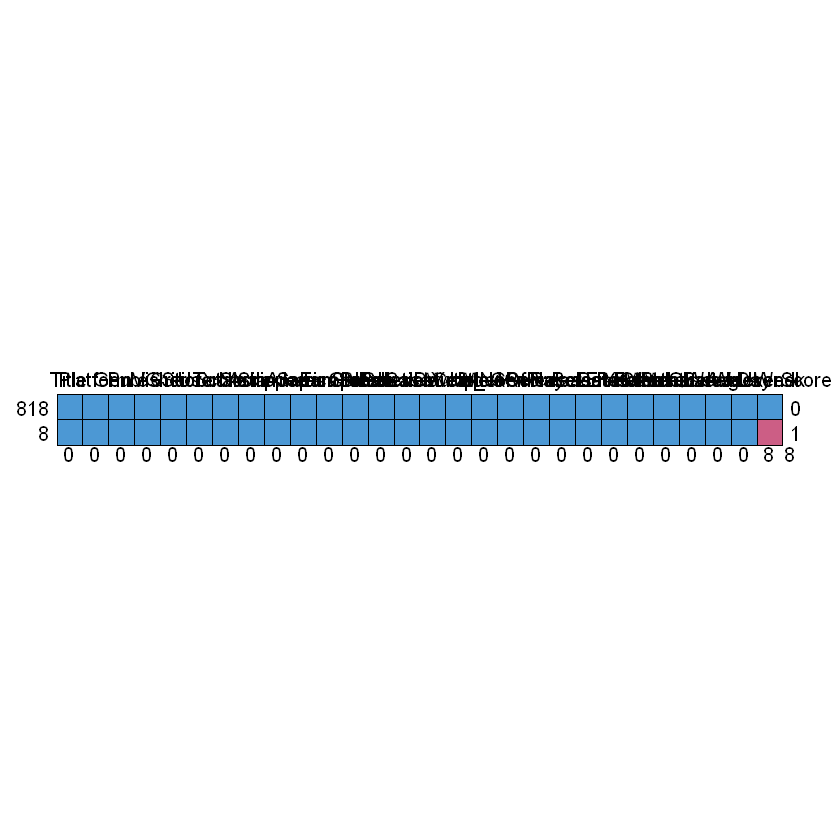

In [71]:
# Check the missing value pattern in AvgUserScore
md.pattern(data)

##### Little's Test #######
# Little's (1988) test statistic to assess if data is MCAR. 
# The null hypothesis (H0) : the data is MCAR

mcar_test(data)

# p-value of mcar test is less than 0.05, reject the H0, the data is not MCAR, hence not recommended to impute missing values, suggest to drop

In [81]:
########################################################
# drop empty values

data <- subset(data, !(AvgUserScore %in% c("$ AvgUserScore", "NA", "")) & !(is.na(AvgUserScore)) & !(ReleaseYear == 1900))


In [82]:
########################################################
# data type
# set the variables to factors (categorical data)
data <- data %>%
  mutate(
    Platform = as.factor(Platform),
    Genre = as.factor(Genre),
    Publisher = as.factor(Publisher),
    Developer = as.factor(Developer),
    NoOfPlayers = as.factor(NoOfPlayers),
    ReleaseWeekend = as.factor(ReleaseWeekend),
    EndOfMonth = as.factor(EndOfMonth),
    ReleaseWeekend = as.integer(ReleaseWeekend),
    MetaScore = as.numeric(MetaScore),
    AvgUserScore = as.numeric (AvgUserScore),
    ReleaseDate = as.Date(ReleaseDate)  
  )

data ['releasedate_1986.2023'] = NULL
data ['releasedate_VGOutput'] = NULL
data ['releasedate_raw'] = NULL
data ['releasedate_link'] = NULL
data ['ReleaseYear_v1'] = NULL

In [83]:
# Check the data
str(data)
summary(data)

'data.frame':	816 obs. of  27 variables:
 $ Title            : chr  "1701 A.D." "2002 FIFA World Cup" "2010 FIFA World Cup South Africa" "ABZU" ...
 $ Platform         : Factor w/ 6 levels "DS","PC","PS",..: 2 2 5 2 6 4 6 4 2 2 ...
 $ Genre            : Factor w/ 8 levels "Adventure","Board Game",..: 7 8 8 1 1 8 1 6 6 7 ...
 $ Publisher        : Factor w/ 8 levels "Activision","Amazon Game Studios",..: 7 7 8 1 3 1 4 4 7 1 ...
 $ VGScore          : num  8 2 7 9 8 6 10 3 5 1 ...
 $ CriticScore      : num  7.7 6 8.2 8 7 8.7 4 4 8.2 10 ...
 $ UserScore        : num  5 7 9 9 7 10 8 8 2 10 ...
 $ TotalShipped     : num  1 277 53 0.58 117 117 189 296 275 231 ...
 $ AsianSales       : num  7.05 3.77 1.23 6.83 3 3 1.09 3 7.34 3.78 ...
 $ NorthAmericaSales: num  4.74 3.55 0.3 1.6 0.03 0.17 0.29 0.05 4.4 3.01 ...
 $ JapanSales       : num  5.85 1.03 0.07 2.48 4.98 3.56 0.05 5.03 3.43 4.72 ...
 $ EuropeSales      : num  2.3 3.58 0.64 5.48 3.98 0.13 0.59 0.04 4.6 5.26 ...
 $ GlobalSales      : num 

    Title           Platform         Genre    
 Length:816         DS : 42   Shooter   :213  
 Class :character   PC :351   Sports    :210  
 Mode  :character   PS : 20   Racing    :120  
                    PS2:223   Adventure :101  
                    PS3:131   Simulation: 81  
                    PS4: 49   Fighting  : 54  
                              (Other)   : 37  
                       Publisher      VGScore        CriticScore    
 Electronic Arts            :179   Min.   : 1.000   Min.   : 1.000  
 Activision                 :145   1st Qu.: 4.000   1st Qu.: 4.000  
 Ubisoft                    :117   Median : 7.000   Median : 8.000  
 Frontier Developments      :113   Mean   : 6.271   Mean   : 6.634  
 Sony Computer Entertainment: 83   3rd Qu.: 8.600   3rd Qu.: 8.700  
 Omega                      : 66   Max.   :10.000   Max.   :10.000  
 (Other)                    :113                                    
   UserScore       TotalShipped     AsianSales     NorthAmericaSales
 Mi

In [84]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

Title          Platform             Genre         Publisher 
              695                 6                 8                 8 
          VGScore       CriticScore         UserScore      TotalShipped 
               28                34                21               345 
       AsianSales NorthAmericaSales        JapanSales       EuropeSales 
              336               400               395               355 
      GlobalSales    ProductionCost         Developer     MultipleGenre 
              654               405               314               249 
        MetaScore      AvgUserScore       NoOfPlayers       ReleaseDate 
               20                54                 6               284 
      ReleaseYear      ReleaseMonth        EndOfMonth    ReleaseQuarter 
               20                12                 2                 4 
   ReleaseWeekDay    ReleaseWeekend       ReleaseWeek 
                7                 2                52

In [85]:
sum(is.na(data))

[1] 0

Data Cleaning

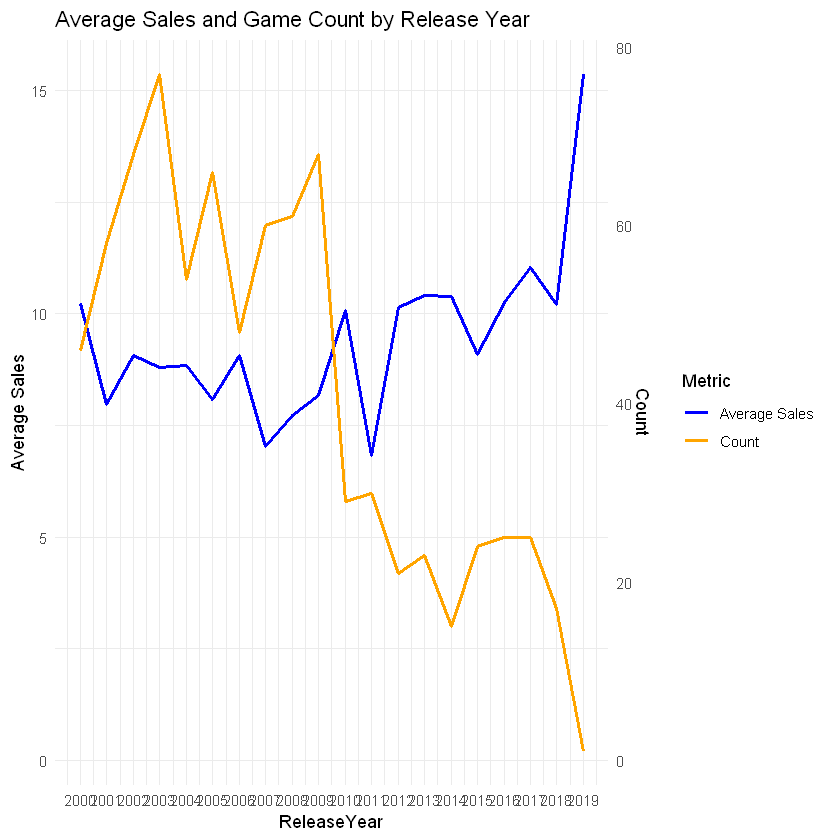

In [86]:
########################################################
# EDA - explore the dataset

# Calculate average sales and count of games released by year
summary_data <- data %>%
  group_by(ReleaseYear) %>%
  summarise(AvgSales = mean(GlobalSales), Count = n())

# Define a scaling factor to make the Count values visible
count_scaling_factor <- max(summary_data$AvgSales) / max(summary_data$Count)

# Create a line graph
ggplot(summary_data, aes(x = ReleaseYear)) +
  geom_line(aes(y = AvgSales, color = "Average Sales"), size = 1) +
  geom_line(aes(y = Count * count_scaling_factor, color = "Count"), size = 1) +
  scale_color_manual(values = c("Average Sales" = "blue", "Count" = "orange")) +
  labs(title = "Average Sales and Game Count by Release Year",
       y = "Average Sales",
       color = "Metric") +
  theme_minimal() +
  scale_y_continuous(
    sec.axis = sec_axis(~./count_scaling_factor, name = "Count")
  ) +
  scale_x_continuous(breaks = unique(summary_data$ReleaseYear))

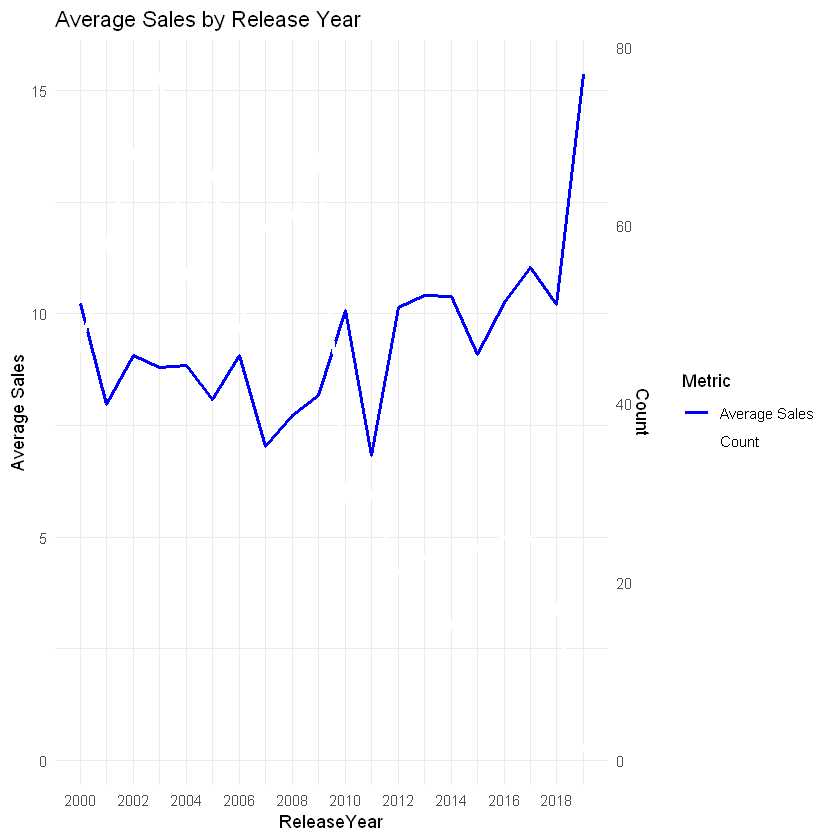

In [209]:
# Subset the years to display on the x-axis (e.g., displaying every 5th year)
years_to_display <- unique(summary_data$ReleaseYear)[seq(1, length(unique(summary_data$ReleaseYear)), by = 2)]

# Create a line graph displaying Average Sales by year and count as a secondary axis
ggplot(summary_data, aes(x = ReleaseYear)) +
  geom_line(aes(y = AvgSales, color = "Average Sales"), size = 1) +
  geom_line(aes(y = Count * count_scaling_factor, color = "Count"), size = 1) +
  scale_color_manual(values = c("Average Sales" = "blue", "Count" = "white")) +
  labs(title = "Average Sales by Release Year",
       y = "Average Sales",
       color = "Metric") +
  theme_minimal() +
  scale_y_continuous(sec.axis = sec_axis(~./count_scaling_factor, name = "Count")) +
  scale_x_continuous(breaks = years_to_display)

In [87]:
summary_data

ReleaseYear,AvgSales,Count
<int>,<dbl>,<int>
2000,10.233478,46
2001,7.967586,58
2002,9.060588,68
2003,8.800260,77
2004,8.850926,54
2005,8.089848,66
2006,9.064792,48
2007,7.022667,60
2008,7.718361,61


In [88]:
# Drop data from 2019 onwards to eliminate covid impact

data <- subset(data, !(ReleaseYear == 2019))

In [89]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

Title          Platform             Genre         Publisher 
              694                 6                 8                 8 
          VGScore       CriticScore         UserScore      TotalShipped 
               28                34                21               345 
       AsianSales NorthAmericaSales        JapanSales       EuropeSales 
              336               400               394               355 
      GlobalSales    ProductionCost         Developer     MultipleGenre 
              653               405               314               248 
        MetaScore      AvgUserScore       NoOfPlayers       ReleaseDate 
               20                54                 6               283 
      ReleaseYear      ReleaseMonth        EndOfMonth    ReleaseQuarter 
               19                12                 2                 4 
   ReleaseWeekDay    ReleaseWeekend       ReleaseWeek 
                7                 2                52

In [90]:
########################################################
# Data inconsistencies spotted for Developer column

# Change 'Developer' column to character
data$Developer <- as.character(data$Developer)

# Define a mapping of replacements as a named vector
  developer_replacements <- c(
  'CodemastersBirmingham' = 'Codemasters',
  'CriterionGames,STELLARENTERTAINMENTSOFTWARELTD' = 'CriterionGames',
  'EABlackBox|EACanada|EACanada,EAVancouver|EAChicago|EADICE|EAGames|EALA|EARedwoodShores|EASaltLake|EASports|EASports,EAVancouver|EASportsBig|EATiburon|EAVancouver|ElectronicArts' = 'Electronic Arts',
  'GearboxSoftware,IronGalaxyStudios' = 'GearboxSoftware',
  'Maxis,EARedwoodShores' = 'Maxis',
  'NamcoBandaiGames' = 'Namco',
  'Nintendo,NintendoSoftwareTechnology' = 'Nintendo',
  'RockstarLeeds|RockstarSanDiego|RockstarStudios|RockstarToronto' = 'Rockstar',
  'SCEA|SCEASanDiegoStudios|SCEE|SCEELondonStudio|SCEJapanStudio|SCESantaMonica|SonyInteractiveEntertainment|SonyInteractiveEntertainment,FirstContactEntertainment|SonyOnlineEntertainment|SonyOnlineEntertainment,DaybreakGames' = 'Sony',
  'SegaAM2|SegaAM3' = 'Sega',
  'UbisoftMontpellier|UbisoftMontreal|UbisoftReflections|UbisoftRomania' = 'Ubisoft'
)

# Use str_replace_all to apply the replacements
data$Developer <- str_replace_all(data$Developer, developer_replacements)

# Convert 'Developer' back to factor
data$Developer <- as.factor(data$Developer)

In [91]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

Title          Platform             Genre         Publisher 
              694                 6                 8                 8 
          VGScore       CriticScore         UserScore      TotalShipped 
               28                34                21               345 
       AsianSales NorthAmericaSales        JapanSales       EuropeSales 
              336               400               394               355 
      GlobalSales    ProductionCost         Developer     MultipleGenre 
              653               405               283               248 
        MetaScore      AvgUserScore       NoOfPlayers       ReleaseDate 
               20                54                 6               283 
      ReleaseYear      ReleaseMonth        EndOfMonth    ReleaseQuarter 
               19                12                 2                 4 
   ReleaseWeekDay    ReleaseWeekend       ReleaseWeek 
                7                 2                52

In [92]:
########################################################
# Group Top 10 after addressing data inconsistencies

# Calculate the frequency of each Developer
developer_counts <- data %>%
  group_by(Developer) %>%
  summarise(n = n()) %>%
  arrange(desc(n))

# Extract the top 10 unique developers based on count frequency
top10_developers <- developer_counts$Developer %>%
  head(10)

# View the top 10
print(top10_developers)

 [1] Electronic Arts   Codemasters       VisualConcepts    Namco            
 [5] Ubisoft           Capcom            SportsInteractive KCET             
 [9] Maxis             Konami           
283 Levels: 1stPlayableProductions 2015 2DBoy 2KCzech 2KGames ... ZipperInteractive


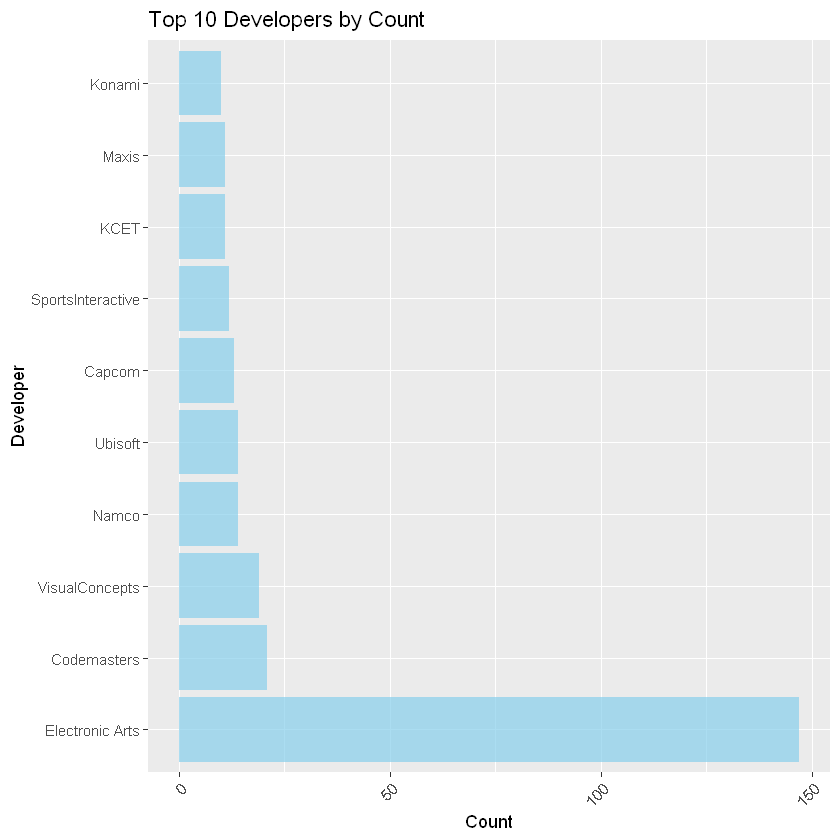

In [93]:
# Visualize top 10 Developers
ggplot(head(developer_counts, 10), aes(x = reorder(Developer, -n), y = n)) +
  geom_bar(stat = "identity", fill = "skyblue", alpha = 0.7) +
  labs(title = "Top 10 Developers by Count",
       x = "Developer",
       y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_flip()

In [94]:
# Create a function to replace with "Others" if not in the top list
replace_with_others <- function(names, top_names) {
  names <- as.character(names)
  names[!names %in% top_names] <- "Others"
  names <- as.factor(names)
  return(names)
}

data$TopDeveloper_Count = data$Developer

# Replace publishers and developers in the original data frame
data$TopDeveloper_Count <- replace_with_others(data$TopDeveloper_Count, top10_developers)

In [95]:
########################################################
# Check the number of distinct values for the variables
sapply(data, function(x) n_distinct(x))

Title           Platform              Genre          Publisher 
               694                  6                  8                  8 
           VGScore        CriticScore          UserScore       TotalShipped 
                28                 34                 21                345 
        AsianSales  NorthAmericaSales         JapanSales        EuropeSales 
               336                400                394                355 
       GlobalSales     ProductionCost          Developer      MultipleGenre 
               653                405                283                248 
         MetaScore       AvgUserScore        NoOfPlayers        ReleaseDate 
                20                 54                  6                283 
       ReleaseYear       ReleaseMonth         EndOfMonth     ReleaseQuarter 
                19                 12                  2                  4 
    ReleaseWeekDay     ReleaseWeekend        ReleaseWeek TopDeveloper_Count 
                 7                  2                 52                 11

In [96]:
## Explore to group Developer by using GlobalSales

# Calculate the sum of GlobalSales for each Developer
developer_sales <- data %>%
  group_by(Developer) %>%
  summarise(GlobalSales = sum(GlobalSales)) %>%
  arrange(desc(GlobalSales))

  # Extract the top 10 unique developers based on count frequency
top10_developers_sum <- developer_sales$Developer %>%
  head(10)

# View the top 10
print(top10_developers_sum)

 [1] Electronic Arts   SportsInteractive Codemasters       Ubisoft          
 [5] Namco             ValveSoftware     KCET              VisualConcepts   
 [9] Nintendo          Maxis            
283 Levels: 1stPlayableProductions 2015 2DBoy 2KCzech 2KGames ... ZipperInteractive


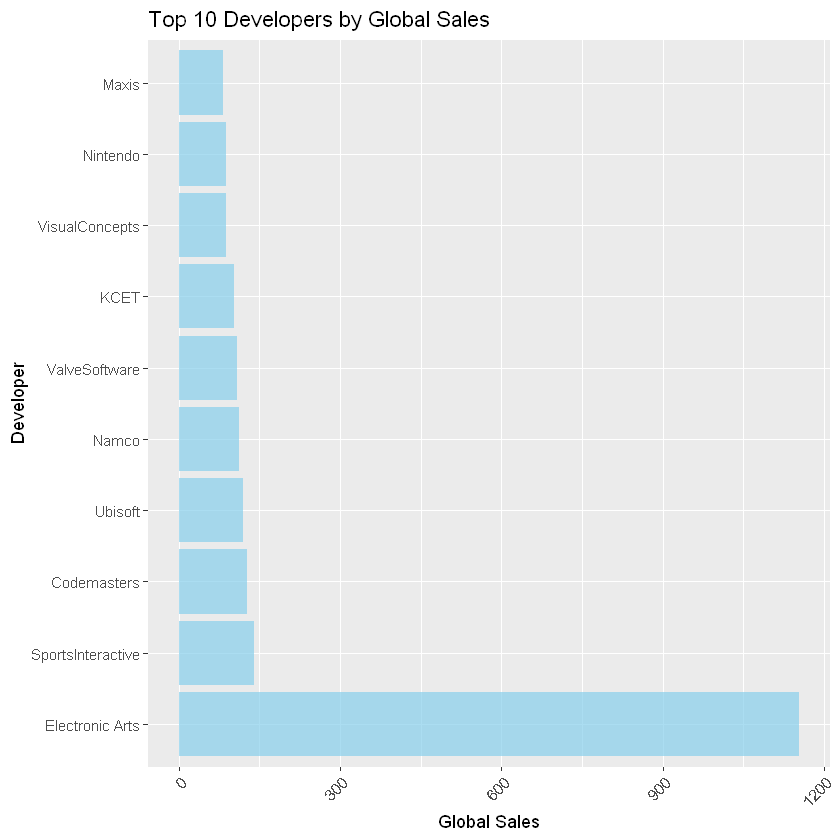

In [97]:
# Visualize top 10 Developers by Global Sales
ggplot(subset(developer_sales, Developer %in% top10_developers_sum), aes(x = reorder(Developer, -GlobalSales), y = GlobalSales)) +
  geom_bar(stat = "identity", fill = "skyblue", alpha = 0.7) +
  labs(title = "Top 10 Developers by Global Sales",
       x = "Developer",
       y = "Global Sales") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_flip()

In [98]:
# Create a function to replace with "Others" if not in the top list
replace_with_others <- function(names, top_names) {
  names <- as.character(names)
  names[!names %in% top_names] <- "Others"
  names <- as.factor(names)
  return(names)
}

data$TopDeveloper_Sum = data$Developer

# Replace publishers and developers in the original data frame
data$TopDeveloper_Sum <- replace_with_others(data$TopDeveloper_Sum, top10_developers_sum)

In [99]:
########################################################
# Check the number of distinct values for the variables
sapply(data, function(x) n_distinct(x))

Title           Platform              Genre          Publisher 
               694                  6                  8                  8 
           VGScore        CriticScore          UserScore       TotalShipped 
                28                 34                 21                345 
        AsianSales  NorthAmericaSales         JapanSales        EuropeSales 
               336                400                394                355 
       GlobalSales     ProductionCost          Developer      MultipleGenre 
               653                405                283                248 
         MetaScore       AvgUserScore        NoOfPlayers        ReleaseDate 
                20                 54                  6                283 
       ReleaseYear       ReleaseMonth         EndOfMonth     ReleaseQuarter 
                19                 12                  2                  4 
    ReleaseWeekDay     ReleaseWeekend        ReleaseWeek TopDeveloper_Count 
                 7                  2                 52                 11 
  TopDeveloper_Sum 
                11

Handle Outliers, Transform Y to be normally distributed

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


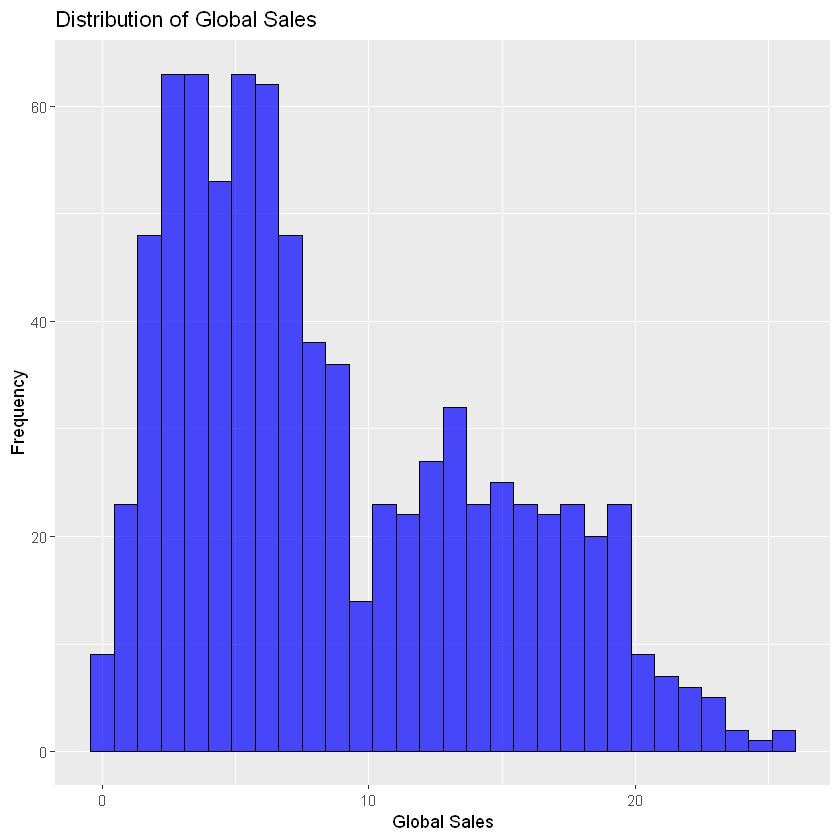

In [100]:
########################################################
# Check the distribution of dependent variable (GlobalSales)

# Create a histogram using ggplot
ggplot(data, aes(x = data$GlobalSales)) +
  geom_histogram(fill = "blue", color = "black", alpha = 0.7) +
  labs(
    title = "Distribution of Global Sales",
    x = "Global Sales",
    y = "Frequency"
  )

In [101]:
# Remove outliers

# Calculate the IQR for Global Sales
Q1 <- quantile(data$GlobalSales, 0.25)
Q3 <- quantile(data$GlobalSales, 0.75)
IQR_value <- Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound <- Q1 - 1.5 * IQR_value
upper_bound <- Q3 + 1.5 * IQR_value

# Identify outliers
outliers <- data$GlobalSales[data$GlobalSales < lower_bound | data$GlobalSales > upper_bound]

# Display the number of outliers removed
cat("Number of outliers:", length(outliers), "\n")

Number of outliers: 0 


Right Skewed Transformation

In [102]:
# Right-skewed: transform 'GlobalSales' using log
data$LogGlobalSales <- log(data$GlobalSales)

In [103]:
# Check for NA values in the LogGobalSales column
na_count <- sum(is.na(data$LogGobalSales))

# Check for NaN values in the LogGobalSales column
nan_count <- sum(is.nan(data$LogGobalSales))

# Check for Inf values in the LogGobalSales column
inf_count <- sum(is.infinite(data$LogGobalSales))

# Print the results
cat("Number of NA values in LogGobalSales:", na_count, "\n")
cat("Number of NaN values in LogGobalSales:", nan_count, "\n")
cat("Number of Inf values in LogGobalSales:", inf_count, "\n")

Number of NA values in LogGobalSales: 0 
Number of NaN values in LogGobalSales: 0 
Number of Inf values in LogGobalSales: 0 


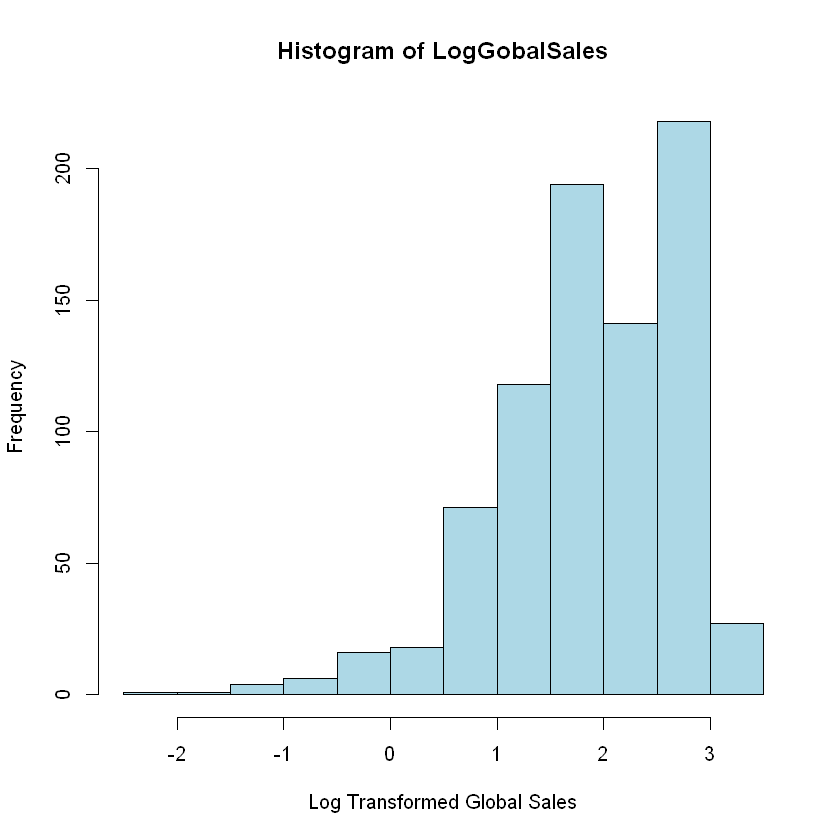

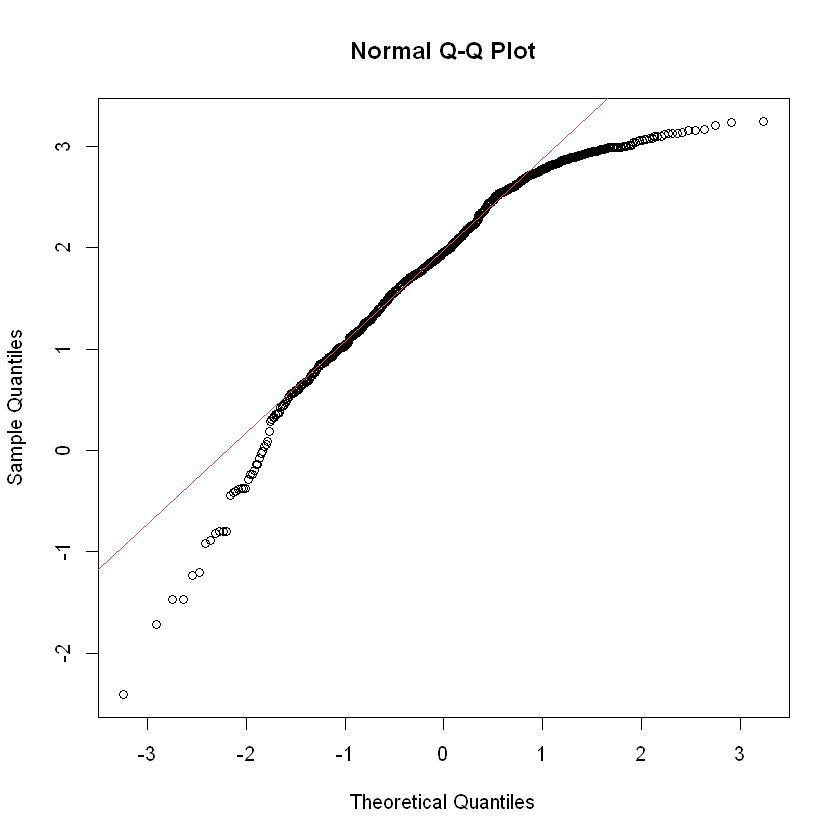

In [104]:
# Create a histogram for 'LogGobalSales'
hist(x = data$LogGlobalSales, main = "Histogram of LogGobalSales", xlab = "Log Transformed Global Sales", col = "lightblue")

# Create a QQ plot for 'LogGobalSales'
qqnorm(data$LogGlobalSales)
qqline(data$LogGlobalSales, col = 2)

# Display both the histogram and the QQ plot side by side
par(mfrow = c(2, 2))

In [105]:
# Right-skewed: transform 'GlobalSales' using square root
data$SqRtGlobalSales <- sqrt(data$GlobalSales)

In [106]:
# Check for NA values in the SqRtGobalSales column
na_count <- sum(is.na(data$SqRtGobalSales))

# Check for NaN values in the SqRtGobalSales column
nan_count <- sum(is.nan(data$SqRtGobalSales))

# Check for Inf values in the SqRtGobalSales column
inf_count <- sum(is.infinite(data$SqRtGobalSales))

# Print the results
cat("Number of NA values in SqRtGobalSales:", na_count, "\n")
cat("Number of NaN values in SqRtGobalSales:", nan_count, "\n")
cat("Number of Inf values in SqRtGobalSales:", inf_count, "\n")

Number of NA values in SqRtGobalSales: 0 
Number of NaN values in SqRtGobalSales: 0 
Number of Inf values in SqRtGobalSales: 0 


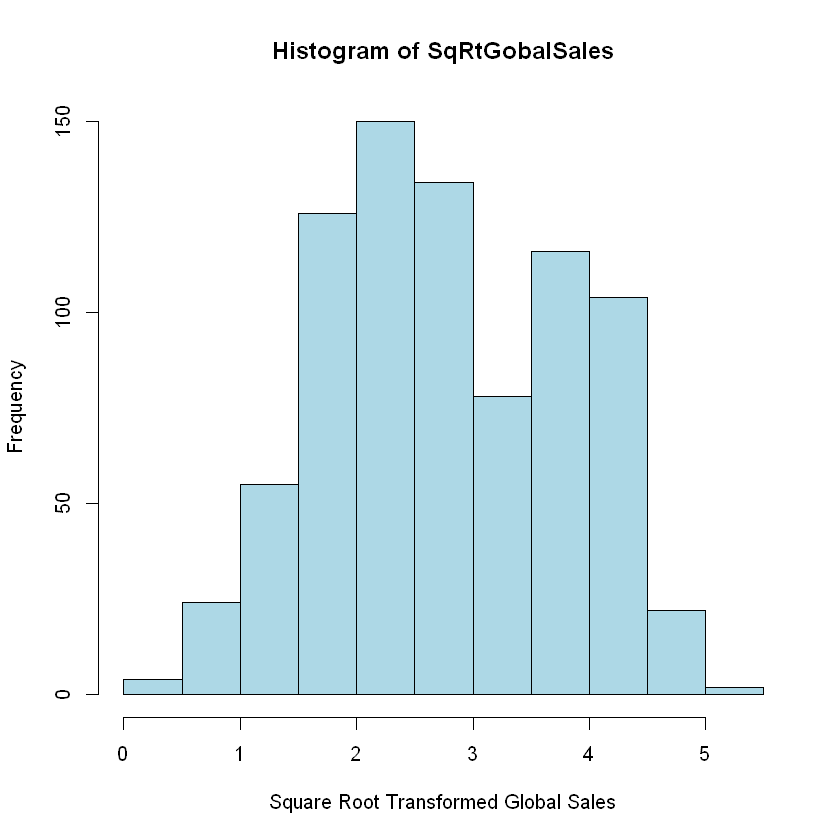

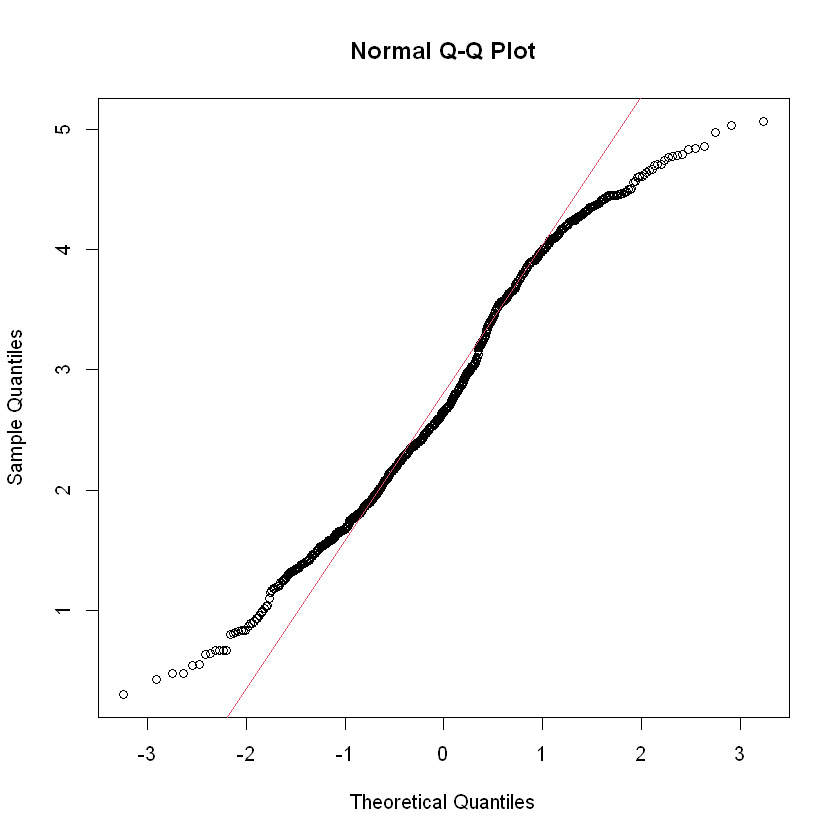

In [107]:
# Create a histogram for 'SqRtGobalSales'
hist(x = data$SqRtGlobalSales, main = "Histogram of SqRtGobalSales", xlab = "Square Root Transformed Global Sales", col = "lightblue")

# Create a QQ plot for 'SqRtGobalSales'
qqnorm(data$SqRtGlobalSales)
qqline(data$SqRtGlobalSales, col = 2)

# Display both the histogram and the QQ plot side by side
par(mfrow = c(2, 2))

In [108]:
# Remove outliers

# Calculate the IQR for Global Sales
Q1 <- quantile(data$SqRtGlobalSales, 0.25)
Q3 <- quantile(data$SqRtGlobalSales, 0.75)
IQR_value <- Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound <- Q1 - 1.5 * IQR_value
upper_bound <- Q3 + 1.5 * IQR_value

# Identify outliers
outliers <- data$SqRtGlobalSales[data$SqRtGlobalSales < lower_bound | data$SqRtGlobalSales > upper_bound]

# Display the number of outliers removed
cat("Number of outliers:", length(outliers), "\n")

Number of outliers: 0 


In [109]:
# Count missing values for each column
missing_count <- colSums(is.na(data))

# Display the count of missing values for each column
print(missing_count)

             Title           Platform              Genre          Publisher 
                 0                  0                  0                  0 
           VGScore        CriticScore          UserScore       TotalShipped 
                 0                  0                  0                  0 
        AsianSales  NorthAmericaSales         JapanSales        EuropeSales 
                 0                  0                  0                  0 
       GlobalSales     ProductionCost          Developer      MultipleGenre 
                 0                  0                  0                  0 
         MetaScore       AvgUserScore        NoOfPlayers        ReleaseDate 
                 0                  0                  0                  0 
       ReleaseYear       ReleaseMonth         EndOfMonth     ReleaseQuarter 
                 0                  0                  0                  0 
    ReleaseWeekDay     ReleaseWeekend        ReleaseWeek TopDeveloper_Count 

Multi-collinearity assessment

In [110]:
# Extract the numerical predictor variables from your data
numerical <- data[, c("AsianSales", "NorthAmericaSales", "JapanSales", "EuropeSales", "GlobalSales",
                    "VGScore", "CriticScore", "UserScore", "TotalShipped", "ProductionCost", 
                    "MetaScore", "ReleaseYear", "ReleaseMonth", "ReleaseQuarter", "ReleaseWeekDay", "ReleaseWeekend", "ReleaseWeek")]

# Identify collinear variables
cor_matrix <- cor(numerical)
cor_matrix 

,AsianSales,NorthAmericaSales,JapanSales,EuropeSales,GlobalSales,VGScore,CriticScore,UserScore,TotalShipped,ProductionCost,MetaScore,ReleaseYear,ReleaseMonth,ReleaseQuarter,ReleaseWeekDay,ReleaseWeekend,ReleaseWeek
AsianSales,1.0000000000,0.36802766,0.125414456,0.426378638,0.64038066,0.026639270,0.064410354,-0.028508225,-0.105862682,0.046617529,0.019566207,0.06361438,0.012718877,0.0004890956,0.040186733,-0.007812655,0.012672012
NorthAmericaSales,0.3680276630,1.00000000,0.219807060,0.486340136,0.75840015,0.012013469,-0.042135921,0.014881783,-0.115234956,0.045298112,0.019166869,0.09095066,0.061329651,0.0551763346,0.134397182,0.049045293,0.060731905
JapanSales,0.1254144561,0.21980706,1.000000000,0.197045967,0.49212802,-0.040768009,-0.097819963,0.016272838,-0.022109370,0.035296778,-0.017783725,-0.08629796,-0.008542279,-0.0226881112,0.028506750,0.006761485,-0.004632791
EuropeSales,0.4263786381,0.48634014,0.197045967,1.000000000,0.80598292,0.047366989,-0.053168990,-0.051035619,-0.140256503,0.044454353,-0.006639806,0.09305954,-0.003192373,-0.0045237543,0.137433439,0.077593259,-0.007766531
GlobalSales,0.6403806601,0.75840015,0.492128020,0.805982922,1.00000000,0.025021039,-0.044245685,-0.025742523,-0.157973406,0.058422229,0.045971230,0.05427680,0.024911149,0.0175683889,0.126489943,0.046599291,0.025121083
VGScore,0.0266392696,0.01201347,-0.040768009,0.047366989,0.02502104,1.000000000,-0.001479083,0.029533513,-0.106223990,-0.013214673,-0.031923779,0.32421684,-0.037469593,-0.0501190076,-0.013242352,-0.011791073,-0.035452828
CriticScore,0.0644103545,-0.04213592,-0.097819963,-0.053168990,-0.04424568,-0.001479083,1.000000000,0.015334593,-0.008152876,0.002176961,0.145933358,0.01701733,-0.018201560,-0.0148827175,-0.031171091,-0.024318453,-0.018955547
UserScore,-0.0285082247,0.01488178,0.016272838,-0.051035619,-0.02574252,0.029533513,0.015334593,1.000000000,-0.027644033,0.041219121,0.005761414,0.01386281,-0.001749519,-0.0098186593,-0.025940060,-0.049487987,-0.001799183
TotalShipped,-0.1058626818,-0.11523496,-0.022109370,-0.140256503,-0.15797341,-0.106223990,-0.008152876,-0.027644033,1.000000000,0.055347674,-0.031274203,-0.21895935,0.055684232,0.0522729703,-0.025544642,-0.010844244,0.053048345
ProductionCost,0.0466175287,0.04529811,0.035296778,0.044454353,0.05842223,-0.013214673,0.002176961,0.041219121,0.055347674,1.000000000,0.015332533,-0.02812523,0.024793400,0.0231041987,0.030703514,0.017522206,0.023795383


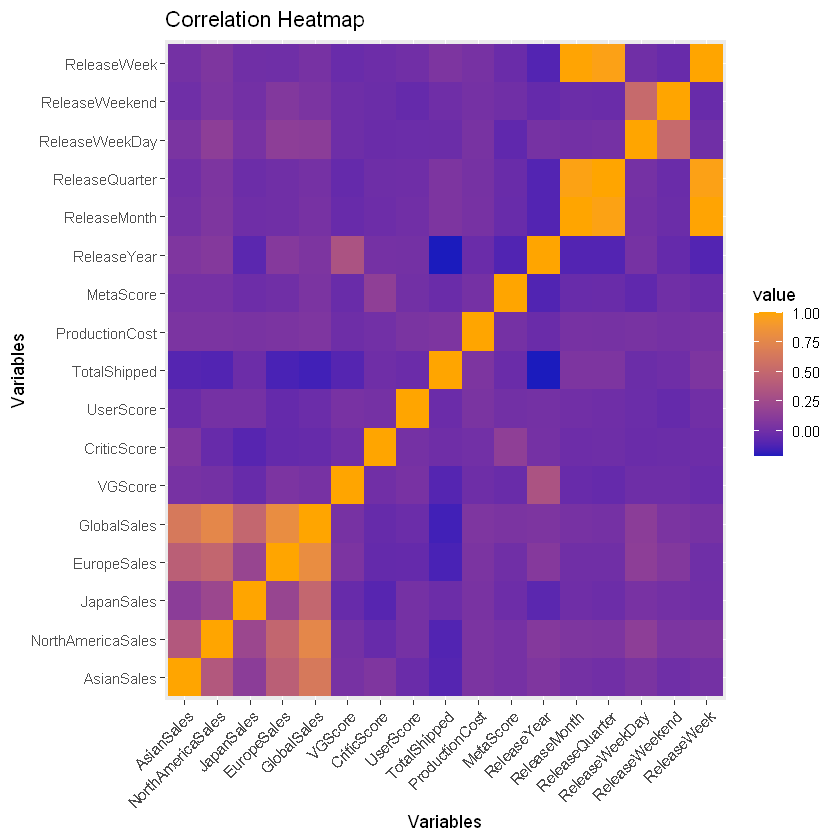

In [111]:
# Reshape the correlation matrix for plotting
cor_melted <- melt(cor_matrix)

# Plotting the heatmap using ggplot
ggplot(cor_melted, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "#1b1bbd", high = "orange") +
  labs(title = "Correlation Heatmap", x = "Variables", y = "Variables") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [112]:
# Select the categorical variables to compare
categorical_variables <- data[, c("Platform", "Genre", "Publisher", "Developer", "NoOfPlayers", "EndOfMonth", "TopDeveloper_Count", "TopDeveloper_Sum")]

# Create an empty matrix to store p-values from chi-square tests
p_values_matrix <- matrix(NA, nrow = ncol(categorical_variables), ncol = ncol(categorical_variables))
rownames(p_values_matrix) <- colnames(p_values_matrix) <- names(categorical_variables)

# Perform chi-square tests for all pairs of categorical variables
for (i in 1:(ncol(categorical_variables) - 1)) {
  for (j in (i + 1):ncol(categorical_variables)) {
    cross_tab <- table(categorical_variables[, i], categorical_variables[, j])
    chi_square_test <- chisq.test(cross_tab)
    p_values_matrix[i, j] <- p_values_matrix[j, i] <- chi_square_test$p.value
  }
}

# Print or view the p-values matrix
print(p_values_matrix)

Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"

Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"


                       Platform         Genre    Publisher     Developer
Platform                     NA  1.146150e-36 4.098947e-01  5.851350e-30
Genre              1.146150e-36            NA 7.173637e-02 3.481961e-207
Publisher          4.098947e-01  7.173637e-02           NA  6.627394e-09
Developer          5.851350e-30 3.481961e-207 6.627394e-09            NA
NoOfPlayers        8.067939e-47  1.838731e-40 7.393081e-01  3.024689e-07
EndOfMonth         2.692597e-01  1.471296e-01 1.672091e-01  8.913350e-02
TopDeveloper_Count 1.154608e-13 1.462085e-117 5.837365e-21  0.000000e+00
TopDeveloper_Sum   1.660058e-28 1.244600e-100 2.362041e-20  0.000000e+00
                    NoOfPlayers  EndOfMonth TopDeveloper_Count TopDeveloper_Sum
Platform           8.067939e-47 0.269259694       1.154608e-13     1.660058e-28
Genre              1.838731e-40 0.147129613      1.462085e-117    1.244600e-100
Publisher          7.393081e-01 0.167209124       5.837365e-21     2.362041e-20
Developer          3.02

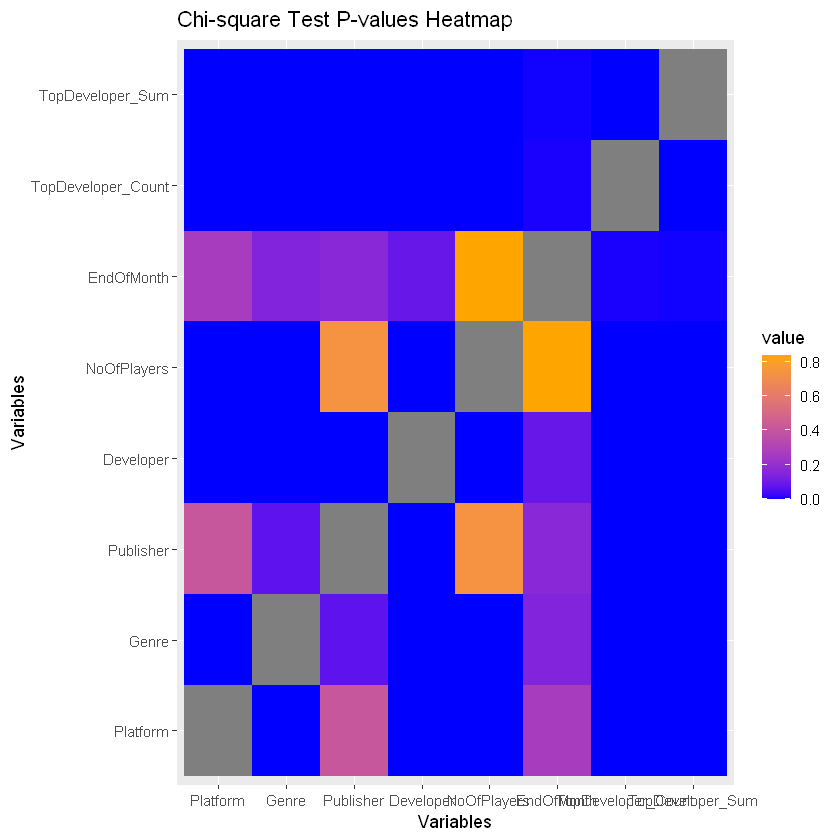

In [113]:
# Reshape the p-values matrix for plotting
p_values_df <- reshape2::melt(p_values_matrix)

# Plotting the heatmap of p-values
ggplot(p_values_df, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "blue", high = "orange") +
  labs(title = "Chi-square Test P-values Heatmap", x = "Variables", y = "Variables")

Split Training and Testing Dataset

In [267]:
########################################################
# Split into 80-20 training-testing dataset

# Set a random seed for reproducibility
set.seed(123)

# Split the data into a training set (80%) and a test set (20%)
split <- sample.split(data$SqRtGlobalSales, SplitRatio = 0.8)
training_data <- subset(data, split == TRUE)
test_data <- subset(data, split == FALSE)

Build LM model

In [115]:
########################################################
# Build LM model

lm_model1 = lm(SqRtGlobalSales ~ . - AsianSales - NorthAmericaSales - JapanSales - EuropeSales - TotalShipped - GlobalSales - LogGlobalSales
                - AvgUserScore - MultipleGenre - Title - Developer - TopDeveloper_Count , data = training_data)
summary(lm_model1)


Call:
lm(formula = SqRtGlobalSales ~ . - AsianSales - NorthAmericaSales - 
    JapanSales - EuropeSales - TotalShipped - GlobalSales - LogGlobalSales - 
    AvgUserScore - MultipleGenre - Title - Developer - TopDeveloper_Count, 
    data = training_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.10218 -0.53362  0.02572  0.56736  2.61220 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -1.620e+01  3.898e+01  -0.416 0.677896    
PlatformPC                            1.710e+00  1.733e-01   9.868  < 2e-16 ***
PlatformPS                            9.007e-01  2.842e-01   3.170 0.001604 ** 
PlatformPS2                           5.124e-01  1.831e-01   2.799 0.005285 ** 
PlatformPS3                           6.286e-01  1.928e-01   3.260 0.001177 ** 
PlatformPS4                           4.649e-01  2.353e-01   1.975 0.048700 *  
GenreBoard Game                      -1.109e+00  8.590e-01  -1.29

In [116]:
########################################################
# Build LM model

lm_model2 = lm(SqRtGlobalSales ~ . - AsianSales - NorthAmericaSales - JapanSales - EuropeSales - TotalShipped - GlobalSales - LogGlobalSales
                - AvgUserScore - MultipleGenre - Title - Developer - TopDeveloper_Sum , data = training_data)
summary(lm_model2)


Call:
lm(formula = SqRtGlobalSales ~ . - AsianSales - NorthAmericaSales - 
    JapanSales - EuropeSales - TotalShipped - GlobalSales - LogGlobalSales - 
    AvgUserScore - MultipleGenre - Title - Developer - TopDeveloper_Sum, 
    data = training_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.15284 -0.54008  0.03962  0.54839  2.56729 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -9.367e+00  3.932e+01  -0.238 0.811816    
PlatformPC                            1.365e+00  1.654e-01   8.258 9.38e-16 ***
PlatformPS                            5.451e-01  2.817e-01   1.935 0.053489 .  
PlatformPS2                           1.305e-01  1.747e-01   0.747 0.455111    
PlatformPS3                           2.581e-01  1.859e-01   1.388 0.165565    
PlatformPS4                           1.234e-01  2.308e-01   0.535 0.592877    
GenreBoard Game                      -1.148e+00  8.678e-01  -1.323 

In [117]:
########################################################
# Build LM model

lm_model3 = lm(SqRtGlobalSales ~ . - AsianSales - NorthAmericaSales - JapanSales - EuropeSales - TotalShipped - GlobalSales - LogGlobalSales
                - VGScore - CriticScore - UserScore - MetaScore - MultipleGenre - Title - Developer - TopDeveloper_Count , data = training_data)
summary(lm_model3)


Call:
lm(formula = SqRtGlobalSales ~ . - AsianSales - NorthAmericaSales - 
    JapanSales - EuropeSales - TotalShipped - GlobalSales - LogGlobalSales - 
    VGScore - CriticScore - UserScore - MetaScore - MultipleGenre - 
    Title - Developer - TopDeveloper_Count, data = training_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.14906 -0.52479  0.03684  0.57507  2.67199 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -2.404e+01  3.942e+01  -0.610 0.542122    
PlatformPC                            1.706e+00  1.733e-01   9.840  < 2e-16 ***
PlatformPS                            9.444e-01  2.837e-01   3.329 0.000926 ***
PlatformPS2                           4.888e-01  1.840e-01   2.656 0.008110 ** 
PlatformPS3                           6.354e-01  1.936e-01   3.283 0.001087 ** 
PlatformPS4                           5.026e-01  2.364e-01   2.126 0.033897 *  
GenreBoard Game                 

In [210]:
########################################################
# Build LM model

lm_model_step <- stepAIC(lm_model1, direction = "both")
summary(lm_model_step)

Start:  AIC=-193.22
SqRtGlobalSales ~ (Title + Platform + Genre + Publisher + VGScore + 
    CriticScore + UserScore + TotalShipped + AsianSales + NorthAmericaSales + 
    JapanSales + EuropeSales + GlobalSales + ProductionCost + 
    Developer + MultipleGenre + MetaScore + AvgUserScore + NoOfPlayers + 
    ReleaseDate + ReleaseYear + ReleaseMonth + EndOfMonth + ReleaseQuarter + 
    ReleaseWeekDay + ReleaseWeekend + ReleaseWeek + TopDeveloper_Count + 
    TopDeveloper_Sum + LogGlobalSales) - AsianSales - NorthAmericaSales - 
    JapanSales - EuropeSales - TotalShipped - GlobalSales - LogGlobalSales - 
    AvgUserScore - MultipleGenre - Title - Developer - TopDeveloper_Count

                   Df Sum of Sq    RSS      AIC
- Publisher         7     5.799 424.21 -198.246
- NoOfPlayers       5     4.203 422.61 -196.704
- ProductionCost    1     0.001 418.41 -195.219
- ReleaseDate       1     0.015 418.42 -195.197
- ReleaseWeek       1     0.170 418.58 -194.956
- ReleaseYear       1     0


Call:
lm(formula = SqRtGlobalSales ~ Platform + Genre + UserScore + 
    MetaScore + ReleaseMonth + EndOfMonth + ReleaseWeekend + 
    ReleaseWeek + TopDeveloper_Sum, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0860 -0.5693  0.0493  0.5650  2.7621 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -0.673248   0.775020  -0.869 0.385354    
PlatformPC                         1.660165   0.168624   9.845  < 2e-16 ***
PlatformPS                         0.808273   0.276006   2.928 0.003531 ** 
PlatformPS2                        0.467426   0.178928   2.612 0.009209 ** 
PlatformPS3                        0.575931   0.186128   3.094 0.002061 ** 
PlatformPS4                        0.477872   0.213863   2.234 0.025806 *  
GenreBoard Game                   -1.065054   0.846987  -1.257 0.209057    
GenreFighting                     -0.535601   0.167930  -3.189 0.001497 ** 
GenrePuzzle      

In [119]:
########################################################
# View using StarGazer

stargazer(lm_model1, lm_model2, lm_model3, lm_model_step, 
          title = "Regression Models Comparison",
          dep.var.caption = "Dependent Variable",
          dep.var.labels = "Response Variable",
          align = TRUE,
          type = "text",
          out = "summary_table.txt")


Regression Models Comparison
                                                                            Dependent Variable                                       
                                     ------------------------------------------------------------------------------------------------
                                                                            Response Variable                                        
                                               (1)                     (2)                     (3)                     (4)           
-------------------------------------------------------------------------------------------------------------------------------------
PlatformPC                                  1.710***                1.365***                1.706***                 1.660***        
                                             (0.173)                 (0.165)                 (0.173)                 (0.169)         
                                

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"


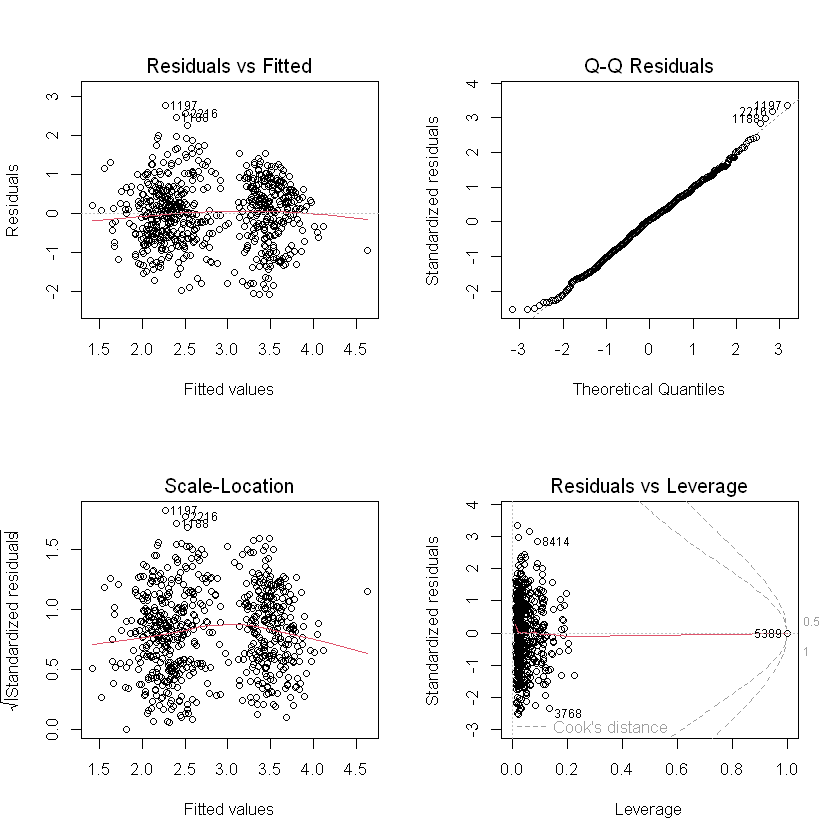

In [292]:
# Create a residual plot
par(mfrow = c(2,2)) # reset the mfrow parameter
plot(lm_model_step)

LM Actual vs Prediction Plot

In [270]:
predicted_values_train <- predict(lm_model_step, training_data)

In [271]:
# Check for NA values in the prediction column
na_count <- sum(is.na(predicted_values_train))

# Check for NaN values in the prediction column
nan_count <- sum(is.nan(predicted_values_train ))

# Check for Inf values in the prediction column
inf_count <- sum(is.infinite(predicted_values_train ))

# Print the results
cat("Number of NA values in prediction:", na_count, "\n")
cat("Number of NaN values in prediction:", nan_count, "\n")
cat("Number of Inf values in prediction:", inf_count, "\n")

Number of NA values in prediction: 0 
Number of NaN values in prediction: 0 
Number of Inf values in prediction: 0 


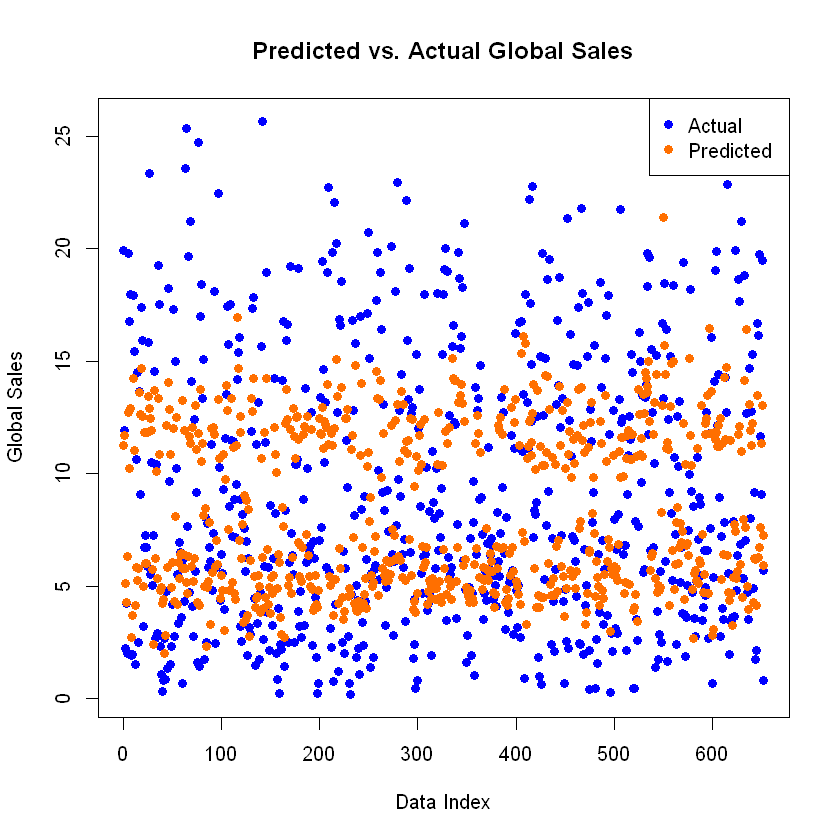

In [335]:
# Convert sqrt-transformed values back to the original scale
actual_values_train <- training_data$GlobalSales
predicted_values_train_sq <- (predicted_values_train)^2

# Create a scatterplot to compare predicted vs actual TotalSales on the training set
plot(seq_along(actual_values_train), actual_values_train,
     main = "Predicted vs. Actual Global Sales",
     xlab = "Data Index", ylab = "Global Sales",
     col = "blue", pch = 16)

# Add the predicted values on the training set
points(seq_along(predicted_values_train_sq), predicted_values_train_sq, col = "#ff6f00", pch = 16)

# Add the fitted line from the lm model
legend("topright", legend = c("Actual", "Predicted"), col = c("blue", "#ff6f00"), pch = 16)


In [278]:
# Calculate various error metrics on the original scale for the training set
errors_train <- training_data$GlobalSales - predicted_values_train_sq
sum_of_sqerrors_train <- sum(errors_train^2)
mean_absolute_deviation_train <- mean(abs(errors_train))
mean_percentage_error_train <- mean(errors_train) * 100  # Already on the original scale
mean_squared_error_train <- mean(errors_train^2)
standard_error_train <- sqrt(mean_squared_error_train)
mean_absolute_percentage_error_train <- mean(abs(errors_train)) * 100

# Print the error metrics for the training set
cat("Sum of Squared Errors (Training):", sum_of_sqerrors_train, "\n")
cat("Mean Absolute Deviation (Training):", mean_absolute_deviation_train, "\n")
cat("Mean Percentage Error (Training):", mean_percentage_error_train, "%\n")
cat("Mean Squared Error (Training):", mean_squared_error_train, "\n")
cat("Standard Error (Training):", standard_error_train, "\n")
cat("Mean Absolute Percentage Error (Training):", mean_absolute_percentage_error_train, "%\n")

Sum of Squared Errors (Training): 14908.36 
Mean Absolute Deviation (Training): 3.667089 
Mean Percentage Error (Training): 66.16253 %
Mean Squared Error (Training): 22.86559 
Standard Error (Training): 4.781797 
Mean Absolute Percentage Error (Training): 366.7089 %


In [274]:
predicted_values_test <- predict(lm_model_step, test_data)

In [275]:
# Check for NA values in the prediction column
na_count <- sum(is.na(predicted_values_test))

# Check for NaN values in the prediction column
nan_count <- sum(is.nan(predicted_values_test))

# Check for Inf values in the prediction column
inf_count <- sum(is.infinite(predicted_values_test))

# Print the results
cat("Number of NA values in prediction:", na_count, "\n")
cat("Number of NaN values in prediction:", nan_count, "\n")
cat("Number of Inf values in prediction:", inf_count, "\n")

Number of NA values in prediction: 0 
Number of NaN values in prediction: 0 
Number of Inf values in prediction: 0 


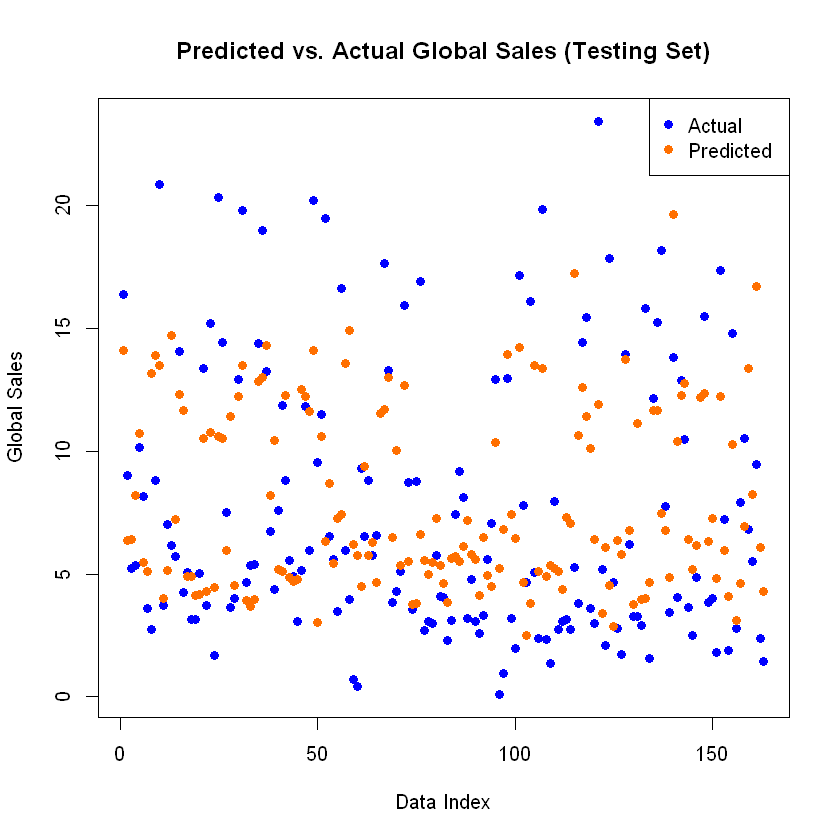

In [322]:
# Convert sqrt-transformed values back to the original scale
actual_values_test <- test_data$GlobalSales
predicted_values_test_sq <- (predicted_values_test)^2

# Create a scatterplot to compare predicted vs actual TotalSales on the training set
plot(seq_along(actual_values_test), actual_values_test,
     main = "Predicted vs. Actual Global Sales (Testing Set)",
     xlab = "Data Index", ylab = "Global Sales",
     col = "blue", pch = 16)

# Add the predicted values on the training set
points(seq_along(predicted_values_test_sq), predicted_values_test_sq, col = "#ff6f00", pch = 16)

# Add the fitted line from the lm model
legend("topright", legend = c("Actual", "Predicted"), col = c("blue", "#ff6f00"), pch = 16)


In [279]:
# Calculate various error metrics on the original scale for the test set
errors_test <- test_data$GlobalSales - predicted_values_test_sq
sum_of_sqerrors_test <- sum(errors_test^2)
mean_absolute_deviation_test <- mean(abs(errors_test))
mean_percentage_error_test <- mean(errors_test) * 100  # Already on the original scale
mean_squared_error_test <- mean(errors_test^2)
standard_error_test <- sqrt(mean_squared_error_test)
mean_absolute_percentage_error_test <- mean(abs(errors_test)) * 100

# Print the error metrics for the test set
cat("Sum of Errors (Test):", sum_of_sqerrors_test, "\n")
cat("Mean Absolute Deviation (Test):", mean_absolute_deviation_test, "\n")
cat("Mean Percentage Error (Test):", mean_percentage_error_test, "%\n")
cat("Mean Squared Error (Test):", mean_squared_error_test, "\n")
cat("Standard Error (Test):", standard_error_test, "\n")
cat("Mean Absolute Percentage Error (Test):", mean_absolute_percentage_error_test, "%\n")

Sum of Errors (Test): 3670.563 
Mean Absolute Deviation (Test): 3.659602 
Mean Percentage Error (Test): -22.32752 %
Mean Squared Error (Test): 22.51879 
Standard Error (Test): 4.745397 
Mean Absolute Percentage Error (Test): 365.9602 %


Normalize the Data for NN

In [214]:
summary(data)

    Title           Platform         Genre    
 Length:815         DS : 42   Shooter   :212  
 Class :character   PC :351   Sports    :210  
 Mode  :character   PS : 20   Racing    :120  
                    PS2:223   Adventure :101  
                    PS3:131   Simulation: 81  
                    PS4: 48   Fighting  : 54  
                              (Other)   : 37  
                       Publisher      VGScore        CriticScore   
 Electronic Arts            :179   Min.   : 1.000   Min.   : 1.00  
 Activision                 :145   1st Qu.: 4.000   1st Qu.: 4.00  
 Ubisoft                    :117   Median : 7.000   Median : 8.00  
 Frontier Developments      :113   Mean   : 6.271   Mean   : 6.64  
 Sony Computer Entertainment: 83   3rd Qu.: 8.600   3rd Qu.: 8.70  
 Omega                      : 66   Max.   :10.000   Max.   :10.00  
 (Other)                    :112                                   
   UserScore       TotalShipped     AsianSales     NorthAmericaSales
 Min.   : 1

In [219]:
str(data)

'data.frame':	815 obs. of  32 variables:
 $ Title              : chr  "1701 A.D." "2002 FIFA World Cup" "2010 FIFA World Cup South Africa" "ABZU" ...
 $ Platform           : Factor w/ 6 levels "DS","PC","PS",..: 2 2 5 2 6 4 6 4 2 2 ...
 $ Genre              : Factor w/ 8 levels "Adventure","Board Game",..: 7 8 8 1 1 8 1 6 6 7 ...
 $ Publisher          : Factor w/ 8 levels "Activision","Amazon Game Studios",..: 7 7 8 1 3 1 4 4 7 1 ...
 $ VGScore            : num  8 2 7 9 8 6 10 3 5 1 ...
 $ CriticScore        : num  7.7 6 8.2 8 7 8.7 4 4 8.2 10 ...
 $ UserScore          : num  5 7 9 9 7 10 8 8 2 10 ...
 $ TotalShipped       : num  1 277 53 0.58 117 117 189 296 275 231 ...
 $ AsianSales         : num  7.05 3.77 1.23 6.83 3 3 1.09 3 7.34 3.78 ...
 $ NorthAmericaSales  : num  4.74 3.55 0.3 1.6 0.03 0.17 0.29 0.05 4.4 3.01 ...
 $ JapanSales         : num  5.85 1.03 0.07 2.48 4.98 3.56 0.05 5.03 3.43 4.72 ...
 $ EuropeSales        : num  2.3 3.58 0.64 5.48 3.98 0.13 0.59 0.04 4.6 5.26 ...
 $

In [217]:
column_names <- names(data)
print(column_names)

 [1] "Title"               "Platform"            "Genre"              
 [4] "Publisher"           "VGScore"             "CriticScore"        
 [7] "UserScore"           "TotalShipped"        "AsianSales"         
[10] "NorthAmericaSales"   "JapanSales"          "EuropeSales"        
[13] "GlobalSales"         "ProductionCost"      "Developer"          
[16] "MultipleGenre"       "MetaScore"           "AvgUserScore"       
[19] "NoOfPlayers"         "ReleaseDate"         "ReleaseYear"        
[22] "ReleaseMonth"        "EndOfMonth"          "ReleaseQuarter"     
[25] "ReleaseWeekDay"      "ReleaseWeekend"      "ReleaseWeek"        
[28] "TopDeveloper_Count"  "TopDeveloper_Sum"    "LogGlobalSales"     
[31] "SqRtGlobalSales"     "NormalizedMetaScore"


In [222]:
# Function to normalize columns using min-max scaling
normalize_columns <- function(data, columns) {
  for (col in columns) {
    data[[paste0("Normalized_", col)]] <- (data[[col]] - min(data[[col]])) / (max(data[[col]]) - min(data[[col]]))
  }
  return(data)
}

# List of columns to normalize
columns_to_normalize <- c("VGScore", "CriticScore", 
                          "UserScore", "ProductionCost", 
                          "MetaScore", "ReleaseYear", 
                          "ReleaseMonth", "ReleaseQuarter", "ReleaseWeekDay", 
                          "ReleaseWeekend", "ReleaseWeek")  

# Applying normalization function to the specified columns and adding as separate columns
data <- normalize_columns(normalized_data, columns_to_normalize)


In [223]:
summary(data)

    Title           Platform         Genre    
 Length:815         DS : 42   Shooter   :212  
 Class :character   PC :351   Sports    :210  
 Mode  :character   PS : 20   Racing    :120  
                    PS2:223   Adventure :101  
                    PS3:131   Simulation: 81  
                    PS4: 48   Fighting  : 54  
                              (Other)   : 37  
                       Publisher      VGScore        CriticScore   
 Electronic Arts            :179   Min.   : 1.000   Min.   : 1.00  
 Activision                 :145   1st Qu.: 4.000   1st Qu.: 4.00  
 Ubisoft                    :117   Median : 7.000   Median : 8.00  
 Frontier Developments      :113   Mean   : 6.271   Mean   : 6.64  
 Sony Computer Entertainment: 83   3rd Qu.: 8.600   3rd Qu.: 8.70  
 Omega                      : 66   Max.   :10.000   Max.   :10.00  
 (Other)                    :112                                   
   UserScore       TotalShipped     AsianSales     NorthAmericaSales
 Min.   : 1

In [227]:
########################################################
# Split into 80-20 training-testing dataset

# Set a random seed for reproducibility
set.seed(123)

# Split the data into a training set (80%) and a test set (20%)
split <- sample.split(data$GlobalSales, SplitRatio = 0.8)
training_data_NN <- subset(data, split == TRUE)
test_data_NN <- subset(data, split == FALSE)

Neural Network_sum [Model 1]

In [234]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model <- keras_model_sequential()

# Add an input layer
model %>% 
  layer_dense(units = 3, input_shape = c(16), activation = "relu")

# Add one or more hidden layers
model %>%
  layer_dense(units = 5, activation = "relu")

# Add an output layer
model %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model with custom absolute error loss and MAE metric
model %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

In [235]:
summary (model)

Model: "sequential_12"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_38 (Dense)                   (None, 3)                       51          
 dense_39 (Dense)                   (None, 5)                       20          
 dense_40 (Dense)                   (None, 1)                       6           
Total params: 77
Trainable params: 77
Non-trainable params: 0
________________________________________________________________________________


In [293]:
# Include specific columns
include_columns <- c("Normalized_VGScore", 
                    "Normalized_CriticScore", 
                    "Normalized_UserScore", 
                    "Normalized_ProductionCost", 
                    "Normalized_MetaScore", 
                    "Normalized_ReleaseYear", 
                    "Normalized_ReleaseMonth",
                    "Normalized_ReleaseQuarter", 
                    "Normalized_ReleaseWeekDay",
                    "Normalized_ReleaseWeekend",
                    "Normalized_ReleaseWeek",
                    "Platform", 
                    "Genre",
                    "Publisher",
                    "Developer", 
                    "NoOfPlayers")
                    
x_train <- training_data_NN[, names(training_data_NN) %in% include_columns]
x_test <- test_data_NN[, names(test_data_NN) %in% include_columns]

In [237]:
# Train the model
history = keras::fit(model, data.matrix(x_train), data.matrix(training_data$GlobalSales), epochs = 100, batch_size = 100, verbose = 1)

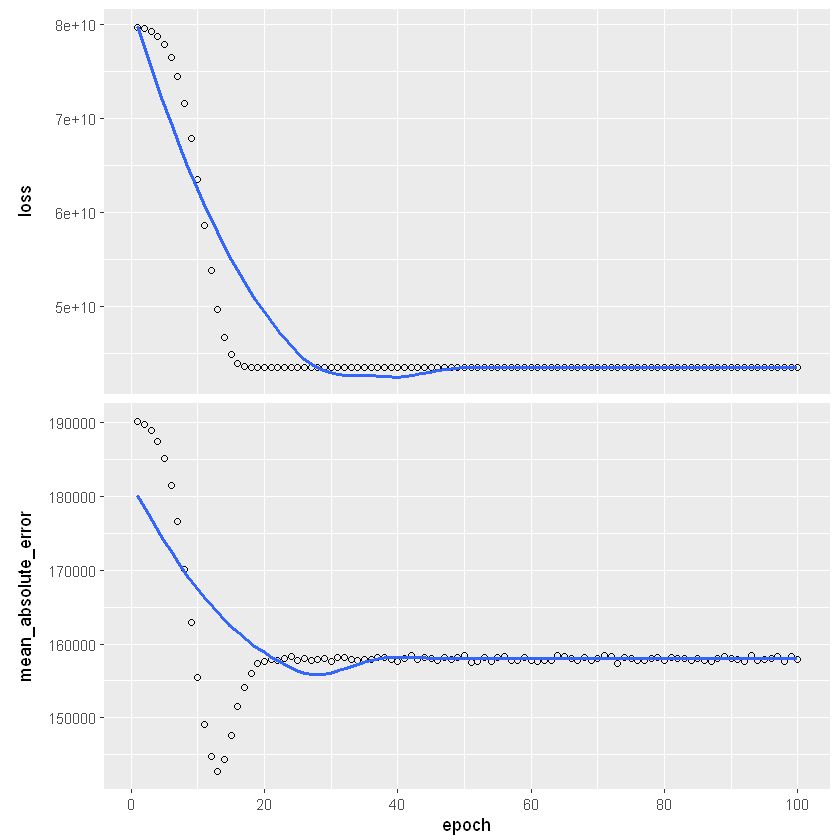

In [216]:
plot(history)

In [238]:
# Evaluate the model
eval_metrics <- model %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data$GlobalSales)  # Target variable for testing
)

In [239]:
# Print the evaluation metrics
print(eval_metrics)

               loss mean_absolute_error 
           36.29319             5.02452 


Test on training data

In [240]:
# Generate predictions using your trained model
predictions <- model %>% predict(data.matrix(x_train))

# Organize results into a data frame
results <- data.frame(Actual_GlobalSales = training_data$GlobalSales, Predicted_GlobalSales = predictions)

# Calculate R-squared using the results data frame
SSR <- sum((results$Predicted_GlobalSales - results$Actual_GlobalSales)^2)  # Sum of squared residuals
SST <- sum((results$Actual_GlobalSales - mean(results$Actual_GlobalSales))^2)  # Total sum of squares

R_squared <- 1 - SSR / SST  # Calculate R-squared
R_squared


[1] -0.1000603

In [281]:
# Calculating the Sum of Squared Errors
sum_sqerrors <- sum((results$Actual_GlobalSales - results$Predicted_GlobalSales)^2)

# Calculating the Mean Absolute Deviation (MAD)
mean_absolute_deviation <- mean(abs(results$Actual_GlobalSales - results$Predicted_GlobalSales))

# Calculating the Mean Percentage Error (MPE)
mean_percentage_error <- mean((results$Actual_GlobalSales - results$Predicted_GlobalSales) / results$Actual_GlobalSales) * 100

# Calculating the Mean Squared Error (MSE)
mean_squared_error <- mean((results$Actual_GlobalSales - results$Predicted_GlobalSales)^2)

# Calculating the Standard Error (Root Mean Squared Error - RMSE)
standard_error <- sqrt(mean((results$Actual_GlobalSales - results$Predicted_GlobalSales)^2))

# Calculating the Mean Absolute Percentage Error (MAPE)
mean_absolute_percentage_error <- mean(abs((results$Actual_GlobalSales - results$Predicted_GlobalSales) / results$Actual_GlobalSales)) * 100

# Displaying the results
cat("Sum of Squared Errors:", sum_sqerrors, "\n")
cat("Mean Absolute Deviation:", mean_absolute_deviation, "\n")
cat("Mean Percentage Error:", mean_percentage_error, "%\n")
cat("Mean Squared Error:", mean_squared_error, "\n")
cat("Standard Error:", standard_error, "\n")
cat("Mean Absolute Percentage Error:", mean_absolute_percentage_error, "%\n")


Sum of Squared Errors: 23430.58 
Mean Absolute Deviation: 4.984313 
Mean Percentage Error: -103.9052 %
Mean Squared Error: 35.93648 
Standard Error: 5.994704 
Mean Absolute Percentage Error: 136.5836 %


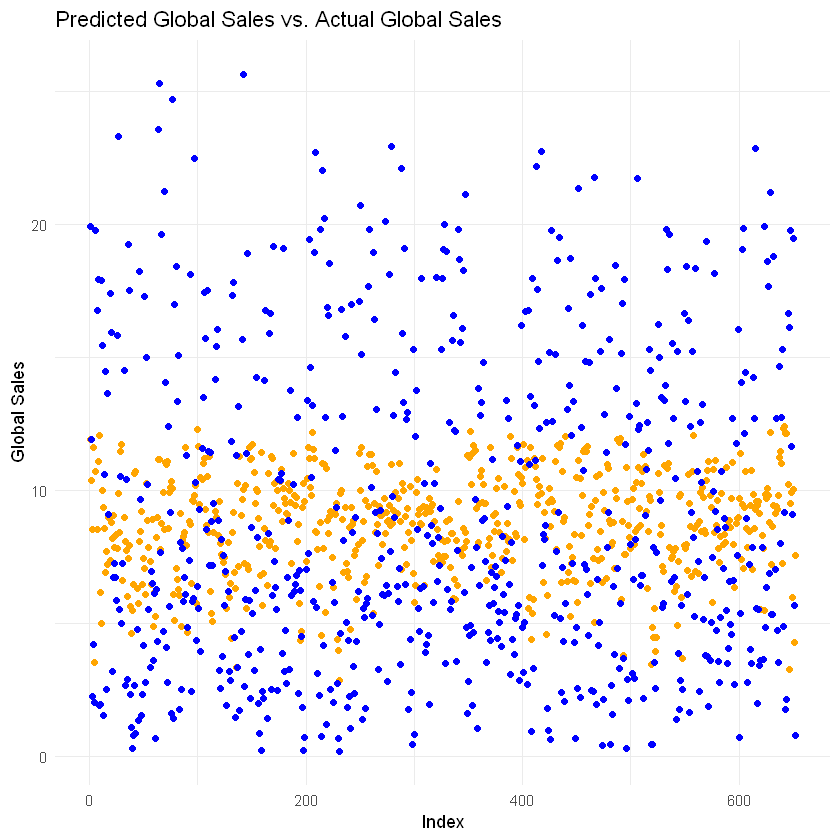

In [282]:
# Create a scatter plot for both predicted and actual values using different colors
ggplot(results, aes(x = seq_along(Actual_GlobalSales))) +
  geom_point(aes(y = Predicted_GlobalSales), color = "orange") +
  geom_point(aes(y = Actual_GlobalSales), color = "blue") +
  labs(x = "Index", y = "Global Sales") +
  ggtitle("Predicted Global Sales vs. Actual Global Sales") +
  theme_minimal()

Test on Testing Data

In [294]:
# Generate predictions using your trained model
predictions <- model %>% predict(data.matrix(x_test))

# Organize results into a data frame
results <- data.frame(Actual_GlobalSales = test_data$GlobalSales, Predicted_GlobalSales = predictions)

# Calculate R-squared using the results data frame
SSR <- sum((results$Predicted_GlobalSales - results$Actual_GlobalSales)^2)  # Sum of squared residuals
SST <- sum((results$Actual_GlobalSales - mean(results$Actual_GlobalSales))^2)  # Total sum of squares

R_squared <- 1 - SSR / SST  # Calculate R-squared
R_squared


[1] -1.692637

In [295]:
# Calculating the Sum of Squared Errors
sum_sqerrors <- sum((results$Actual_GlobalSales - results$Predicted_GlobalSales)^2)

# Calculating the Mean Absolute Deviation (MAD)
mean_absolute_deviation <- mean(abs(results$Actual_GlobalSales - results$Predicted_GlobalSales))

# Calculating the Mean Percentage Error (MPE)
mean_percentage_error <- mean((results$Actual_GlobalSales - results$Predicted_GlobalSales) / results$Actual_GlobalSales) * 100

# Calculating the Mean Squared Error (MSE)
mean_squared_error <- mean((results$Actual_GlobalSales - results$Predicted_GlobalSales)^2)

# Calculating the Standard Error (Root Mean Squared Error - RMSE)
standard_error <- sqrt(mean((results$Actual_GlobalSales - results$Predicted_GlobalSales)^2))

# Calculating the Mean Absolute Percentage Error (MAPE)
mean_absolute_percentage_error <- mean(abs((results$Actual_GlobalSales - results$Predicted_GlobalSales) / results$Actual_GlobalSales)) * 100

# Displaying the results
cat("Sum of Squared Errors:", sum_sqerrors, "\n")
cat("Mean Absolute Deviation:", mean_absolute_deviation, "\n")
cat("Mean Percentage Error:", mean_percentage_error, "%\n")
cat("Mean Squared Error:", mean_squared_error, "\n")
cat("Standard Error:", standard_error, "\n")
cat("Mean Absolute Percentage Error:", mean_absolute_percentage_error, "%\n")


Sum of Squared Errors: 13321.23 
Mean Absolute Deviation: 7.174803 
Mean Percentage Error: 83.79677 %
Mean Squared Error: 81.72535 
Standard Error: 9.040208 
Mean Absolute Percentage Error: 90.40518 %


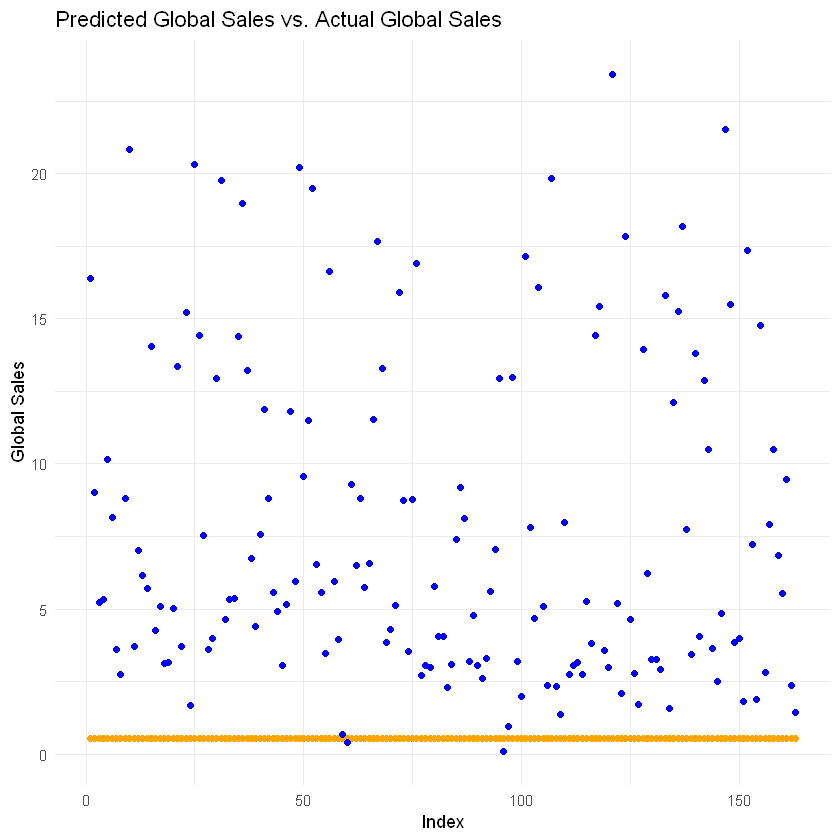

In [296]:
# Create a scatter plot for both predicted and actual values using different colors
ggplot(results, aes(x = seq_along(Actual_GlobalSales))) +
  geom_point(aes(y = Predicted_GlobalSales), color = "orange") +
  geom_point(aes(y = Actual_GlobalSales), color = "blue") +
  labs(x = "Index", y = "Global Sales") +
  ggtitle("Predicted Global Sales vs. Actual Global Sales") +
  theme_minimal()

In [120]:
# Export to excel

write_xlsx(results, path = "NN_results.xlsx")

Neural Network_sum [Model 2]

In [297]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model <- keras_model_sequential()

# Add an input layer
model %>% 
  layer_dense(units = 4, input_shape = c(16), activation = "relu")

# Add one or more hidden layers
model %>%
  layer_dense(units = 2, activation = "relu")

# Add an output layer
model %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model with custom absolute error loss and MAE metric
model %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

In [298]:
summary (model)

Model: "sequential_17"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_53 (Dense)                   (None, 4)                       68          
 dense_54 (Dense)                   (None, 2)                       10          
 dense_55 (Dense)                   (None, 1)                       3           
Total params: 81
Trainable params: 81
Non-trainable params: 0
________________________________________________________________________________


In [308]:
# Train the model
history = keras::fit(model, data.matrix(x_train), data.matrix(training_data$GlobalSales), epochs = 100, batch_size = 100, verbose = 1)

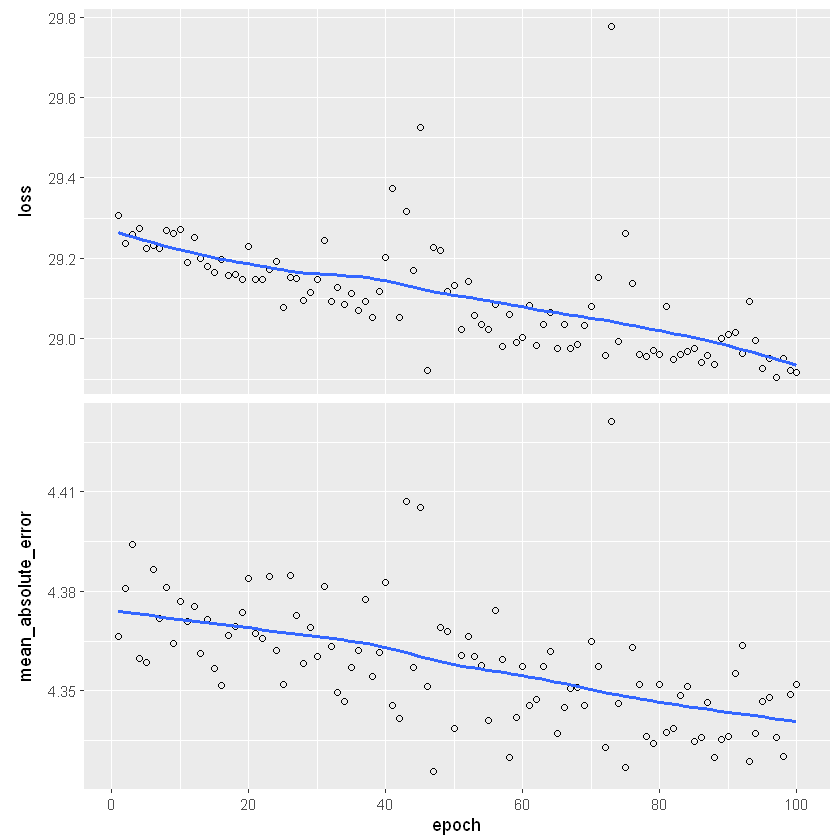

In [309]:
plot(history)

In [310]:
# Evaluate the model
eval_metrics <- model %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data$GlobalSales)  # Target variable for testing
)

In [311]:
# Print the evaluation metrics
print(eval_metrics)

               loss mean_absolute_error 
          26.051537            4.106274 


Test on training data

In [331]:
# Generate predictions using your trained model
predictions <- model %>% predict(data.matrix(x_train))

# Organize results into a data frame
results <- data.frame(Actual_GlobalSales = training_data$GlobalSales, Predicted_GlobalSales = predictions)

# Calculate R-squared using the results data frame
SSR <- sum((results$Predicted_GlobalSales - results$Actual_GlobalSales)^2)  # Sum of squared residuals
SST <- sum((results$Actual_GlobalSales - mean(results$Actual_GlobalSales))^2)  # Total sum of squares

R_squared <- 1 - SSR / SST  # Calculate R-squared
R_squared

[1] 0.1855459

In [313]:
# Calculating the Sum of Errors
sum_errors <- sum(results$Actual_GlobalSales - results$Predicted_GlobalSales)

# Calculating the Mean Absolute Deviation (MAD)
mean_absolute_deviation <- mean(abs(results$Actual_GlobalSales - results$Predicted_GlobalSales))

# Calculating the Mean Percentage Error (MPE)
mean_percentage_error <- mean((results$Actual_GlobalSales - results$Predicted_GlobalSales) / results$Actual_GlobalSales) * 100

# Calculating the Mean Squared Error (MSE)
mean_squared_error <- mean((results$Actual_GlobalSales - results$Predicted_GlobalSales)^2)

# Calculating the Standard Error (Root Mean Squared Error - RMSE)
standard_error <- sqrt(mean((results$Actual_GlobalSales - results$Predicted_GlobalSales)^2))

# Calculating the Mean Absolute Percentage Error (MAPE)
mean_absolute_percentage_error <- mean(abs((results$Actual_GlobalSales - results$Predicted_GlobalSales) / results$Actual_GlobalSales)) * 100

# Displaying the results
cat("Sum of Errors:", sum_errors, "\n")
cat("Mean Absolute Deviation:", mean_absolute_deviation, "\n")
cat("Mean Percentage Error:", mean_percentage_error, "%\n")
cat("Mean Squared Error:", mean_squared_error, "\n")
cat("Standard Error:", standard_error, "\n")
cat("Mean Absolute Percentage Error:", mean_absolute_percentage_error, "%\n")


Sum of Errors: 46.43848 
Mean Absolute Deviation: 4.340531 
Mean Percentage Error: -99.89546 %
Mean Squared Error: 28.87753 
Standard Error: 5.373782 
Mean Absolute Percentage Error: 128.2694 %


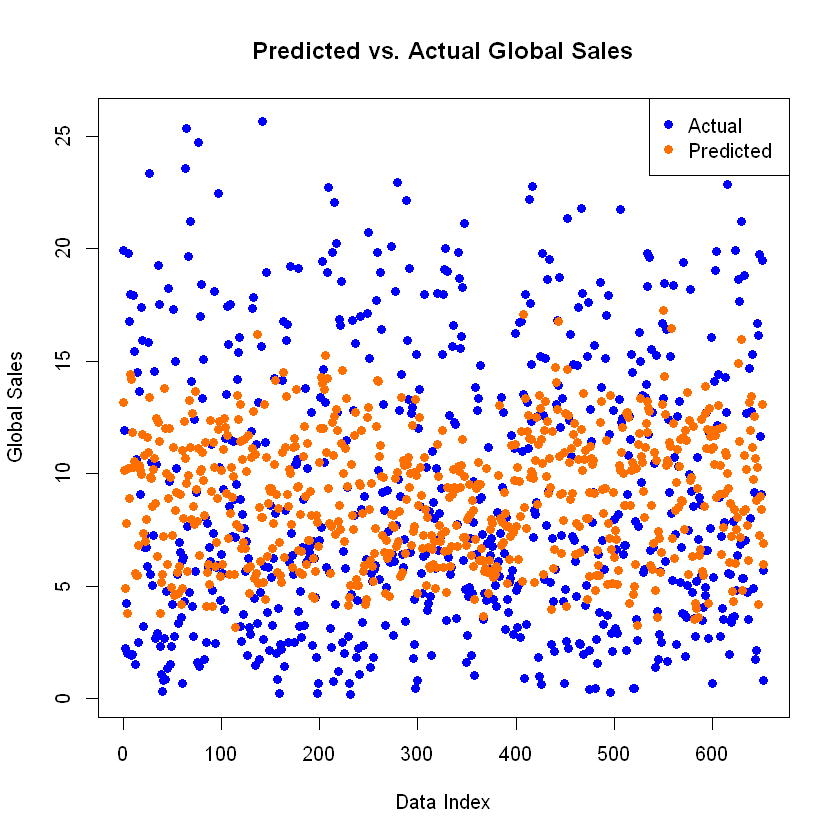

In [334]:
# Creating a simple scatterplot if 'results' contains the necessary columns
plot(seq_along(results$Actual_GlobalSales), results$Actual_GlobalSales,
     main = "Predicted vs. Actual Global Sales",
     xlab = "Data Index", ylab = "Global Sales",
     col = "blue", pch = 16)

# Adding the predicted values on the training set if 'results' contains the necessary columns
points(seq_along(results$Predicted_GlobalSales), results$Predicted_GlobalSales, col = "#ff6f00", pch = 16)

# Adding the legend
legend("topright", legend = c("Actual", "Predicted"), col = c("blue", "#ff6f00"), pch = 16)


Test on testing data

In [327]:
# Generate predictions using your trained model
predictions <- model %>% predict(data.matrix(x_test))

# Organize results into a data frame
results <- data.frame(Actual_GlobalSales = test_data$GlobalSales, Predicted_GlobalSales = predictions)

# Calculate R-squared using the results data frame
SSR <- sum((results$Predicted_GlobalSales - results$Actual_GlobalSales)^2)  # Sum of squared residuals
SST <- sum((results$Actual_GlobalSales - mean(results$Actual_GlobalSales))^2)  # Total sum of squares

R_squared <- 1 - SSR / SST  # Calculate R-squared
R_squared

[1] 0.1416698

In [316]:
# Calculating the Sum of Errors
sum_errors <- sum(results$Actual_GlobalSales - results$Predicted_GlobalSales)

# Calculating the Mean Absolute Deviation (MAD)
mean_absolute_deviation <- mean(abs(results$Actual_GlobalSales - results$Predicted_GlobalSales))

# Calculating the Mean Percentage Error (MPE)
mean_percentage_error <- mean((results$Actual_GlobalSales - results$Predicted_GlobalSales) / results$Actual_GlobalSales) * 100

# Calculating the Mean Squared Error (MSE)
mean_squared_error <- mean((results$Actual_GlobalSales - results$Predicted_GlobalSales)^2)

# Calculating the Standard Error (Root Mean Squared Error - RMSE)
standard_error <- sqrt(mean((results$Actual_GlobalSales - results$Predicted_GlobalSales)^2))

# Calculating the Mean Absolute Percentage Error (MAPE)
mean_absolute_percentage_error <- mean(abs((results$Actual_GlobalSales - results$Predicted_GlobalSales) / results$Actual_GlobalSales)) * 100

# Displaying the results
cat("Sum of Errors:", sum_errors, "\n")
cat("Mean Absolute Deviation:", mean_absolute_deviation, "\n")
cat("Mean Percentage Error:", mean_percentage_error, "%\n")
cat("Mean Squared Error:", mean_squared_error, "\n")
cat("Standard Error:", standard_error, "\n")
cat("Mean Absolute Percentage Error:", mean_absolute_percentage_error, "%\n")


Sum of Errors: -129.4179 
Mean Absolute Deviation: 4.106274 
Mean Percentage Error: -122.7723 %
Mean Squared Error: 26.05154 
Standard Error: 5.104071 
Mean Absolute Percentage Error: 144.8882 %


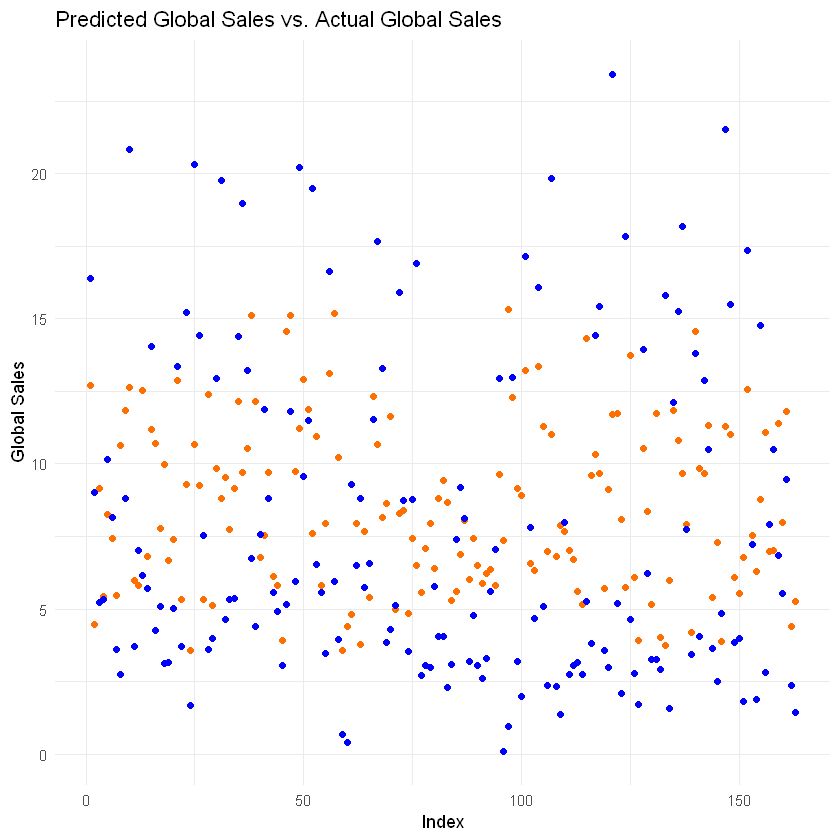

In [328]:
# Create a scatter plot for both predicted and actual values using different colors
ggplot(results, aes(x = seq_along(Actual_GlobalSales))) +
  geom_point(aes(y = Predicted_GlobalSales), color = "#ff6f00") +
  geom_point(aes(y = Actual_GlobalSales), color = "blue") +
  labs(x = "Index", y = "Global Sales") +
  ggtitle("Predicted Global Sales vs. Actual Global Sales") +
  theme_minimal()